In [81]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [82]:
os.chdir('C:/Users/sindu/OneDrive - The University of Texas at Dallas/Documents/BALC proj/House Price')

In [83]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('test.csv')

In [84]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [85]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [87]:
numerical_features_train_df = train.select_dtypes(include=[np.number])
categorical_features_train_df = train.select_dtypes(include=[np.object])

In [88]:
numerical_features_train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [89]:
categorical_features_train_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
# Checking for skewness
from scipy.stats import skew 
skewness = numerical_features_train_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [91]:
# Log transformation applied only for skewness > 5
numerical_features_train_df['MiscVal'] = np.log1p(numerical_features_train_df['MiscVal'])
numerical_features_train_df['PoolArea'] = np.log1p(numerical_features_train_df['PoolArea'])
numerical_features_train_df['LotArea'] = np.log1p(numerical_features_train_df['LotArea'])
numerical_features_train_df['3SsnPorch'] = np.log1p(numerical_features_train_df['3SsnPorch'])
numerical_features_train_df['LowQualFinSF'] = np.log1p(numerical_features_train_df['LowQualFinSF'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [92]:
# Checking for skewness
from scipy.stats import skew 
skewness = numerical_features_train_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
LotArea          -0.137263
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [93]:
train_numerical_features = train.select_dtypes(include=[np.number]).columns
train_categorical_features = train.select_dtypes(include=[np.object]).columns

In [94]:
train_numerical_features.shape

(38,)

In [95]:
train_categorical_features.shape

(43,)

In [96]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [97]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


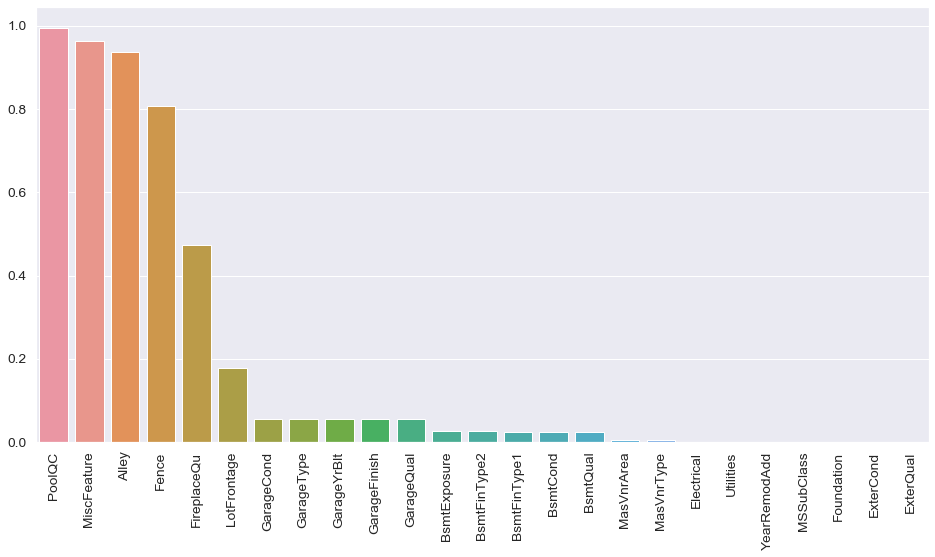

In [98]:
plt.figure(figsize=(16,8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index[0:25], y=percent[0:25])
plt.show()

### Explarotary Data Analysis


#### Numerical Variables

The Skewness of the SalePrce (target variable) is =  1.8828757597682129


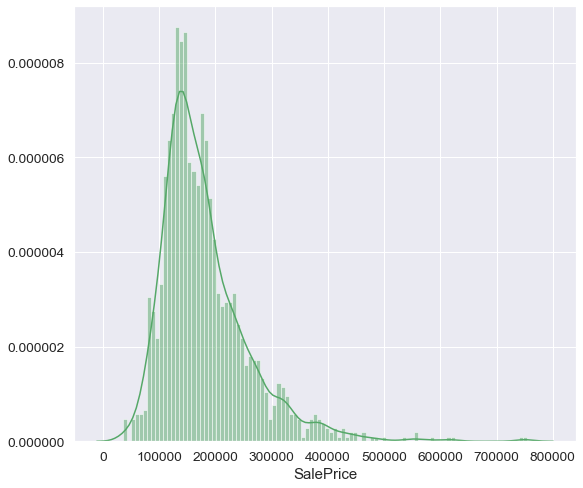

In [99]:
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.5});
print('The Skewness of the SalePrce (target variable) is = ', train['SalePrice'].skew())

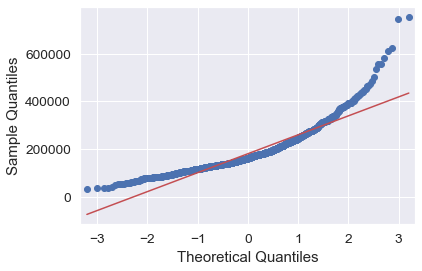

In [100]:
from statsmodels.graphics.gofplots import qqplot
qqplot(train['SalePrice'], line='s')
plt.show()

The Skewness of the SalePrce (target variable) is =  0.6328002675557115


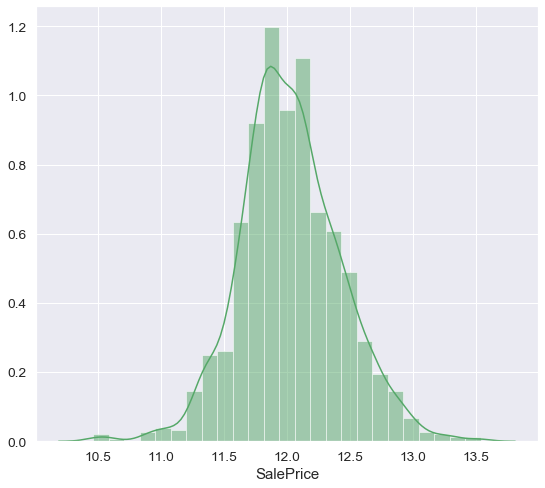

In [101]:
plt.figure(figsize=(9, 8))
sns.distplot(np.log(train['SalePrice']), color='g', bins=25, hist_kws={'alpha': 0.5});
print('The Skewness of the SalePrce (target variable) is = ', np.log(train['SalePrice'].skew()))

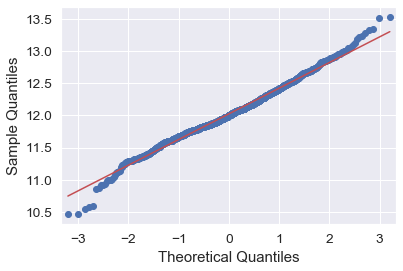

In [102]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(train['SalePrice']), line='s')
plt.show()

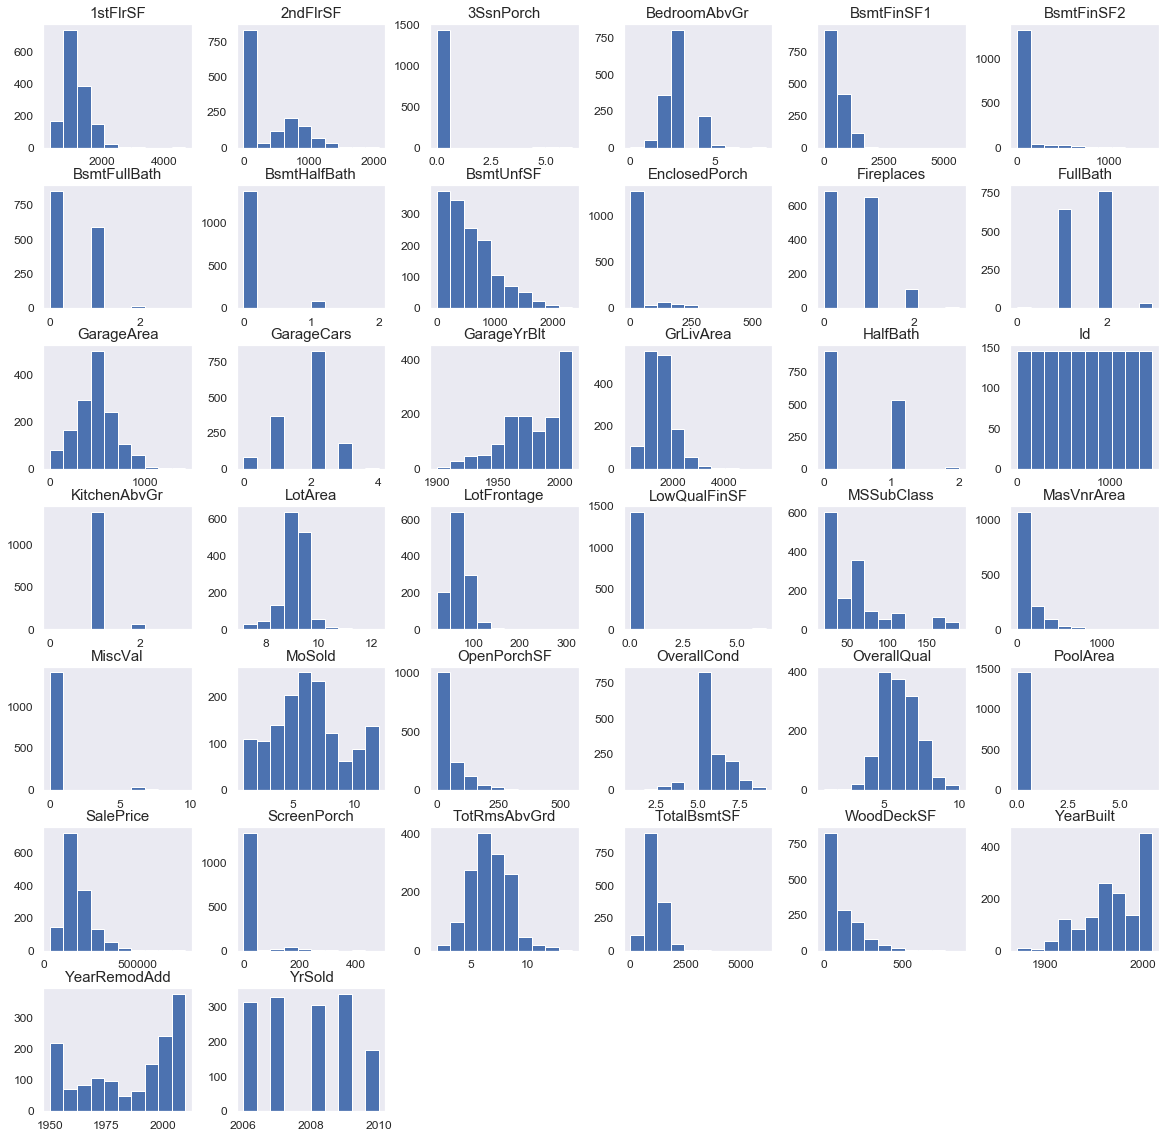

In [103]:
numerical_features_train_df.hist(figsize = (20,20), xlabelsize=12, ylabelsize=12, grid=False)
plt.show()

(1) GarageArea, TotRmsAbvGrd is approximately normally distributed. Apart from these every is has a non-normal distribution.

(2) From the distributions, we can observe that the predictors are on different range.

In [104]:
corr = numerical_features_train_df.corr()
corr.style.background_gradient(cmap='coolwarm')


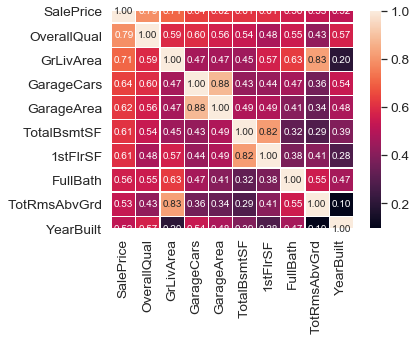

In [105]:
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numerical_features_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar="YlGnBu", annot=True, square=True, linewidths=.2, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

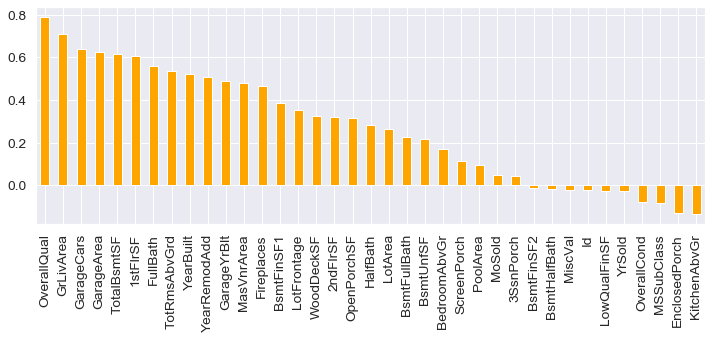

In [106]:
train.corr()['SalePrice'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(12, 4), color='orange')
plt.show()

####  Categorical Analysis


In [107]:
print('No. of categorical variables are = ', len(categorical_features_train_df.columns))

No. of categorical variables are =  43


In [108]:
for feature in categorical_features_train_df:
    print('\nunique categories of', feature, 'are :')
    print(train[feature].unique())


unique categories of MSZoning are :
['RL' 'RM' 'C (all)' 'FV' 'RH']

unique categories of Street are :
['Pave' 'Grvl']

unique categories of Alley are :
[nan 'Grvl' 'Pave']

unique categories of LotShape are :
['Reg' 'IR1' 'IR2' 'IR3']

unique categories of LandContour are :
['Lvl' 'Bnk' 'Low' 'HLS']

unique categories of Utilities are :
['AllPub' 'NoSeWa']

unique categories of LotConfig are :
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

unique categories of LandSlope are :
['Gtl' 'Mod' 'Sev']

unique categories of Neighborhood are :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

unique categories of Condition1 are :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

unique categories of Condition2 are :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

unique

In [109]:
for col in categorical_features_train_df:
    print('column name:', col)
    print('number of items: ',categorical_features_train_df[col].nunique())
    print('')

column name: MSZoning
number of items:  5

column name: Street
number of items:  2

column name: Alley
number of items:  2

column name: LotShape
number of items:  4

column name: LandContour
number of items:  4

column name: Utilities
number of items:  2

column name: LotConfig
number of items:  5

column name: LandSlope
number of items:  3

column name: Neighborhood
number of items:  25

column name: Condition1
number of items:  9

column name: Condition2
number of items:  8

column name: BldgType
number of items:  5

column name: HouseStyle
number of items:  8

column name: RoofStyle
number of items:  6

column name: RoofMatl
number of items:  8

column name: Exterior1st
number of items:  15

column name: Exterior2nd
number of items:  16

column name: MasVnrType
number of items:  4

column name: ExterQual
number of items:  4

column name: ExterCond
number of items:  5

column name: Foundation
number of items:  6

column name: BsmtQual
number of items:  4

column name: BsmtCond
numbe

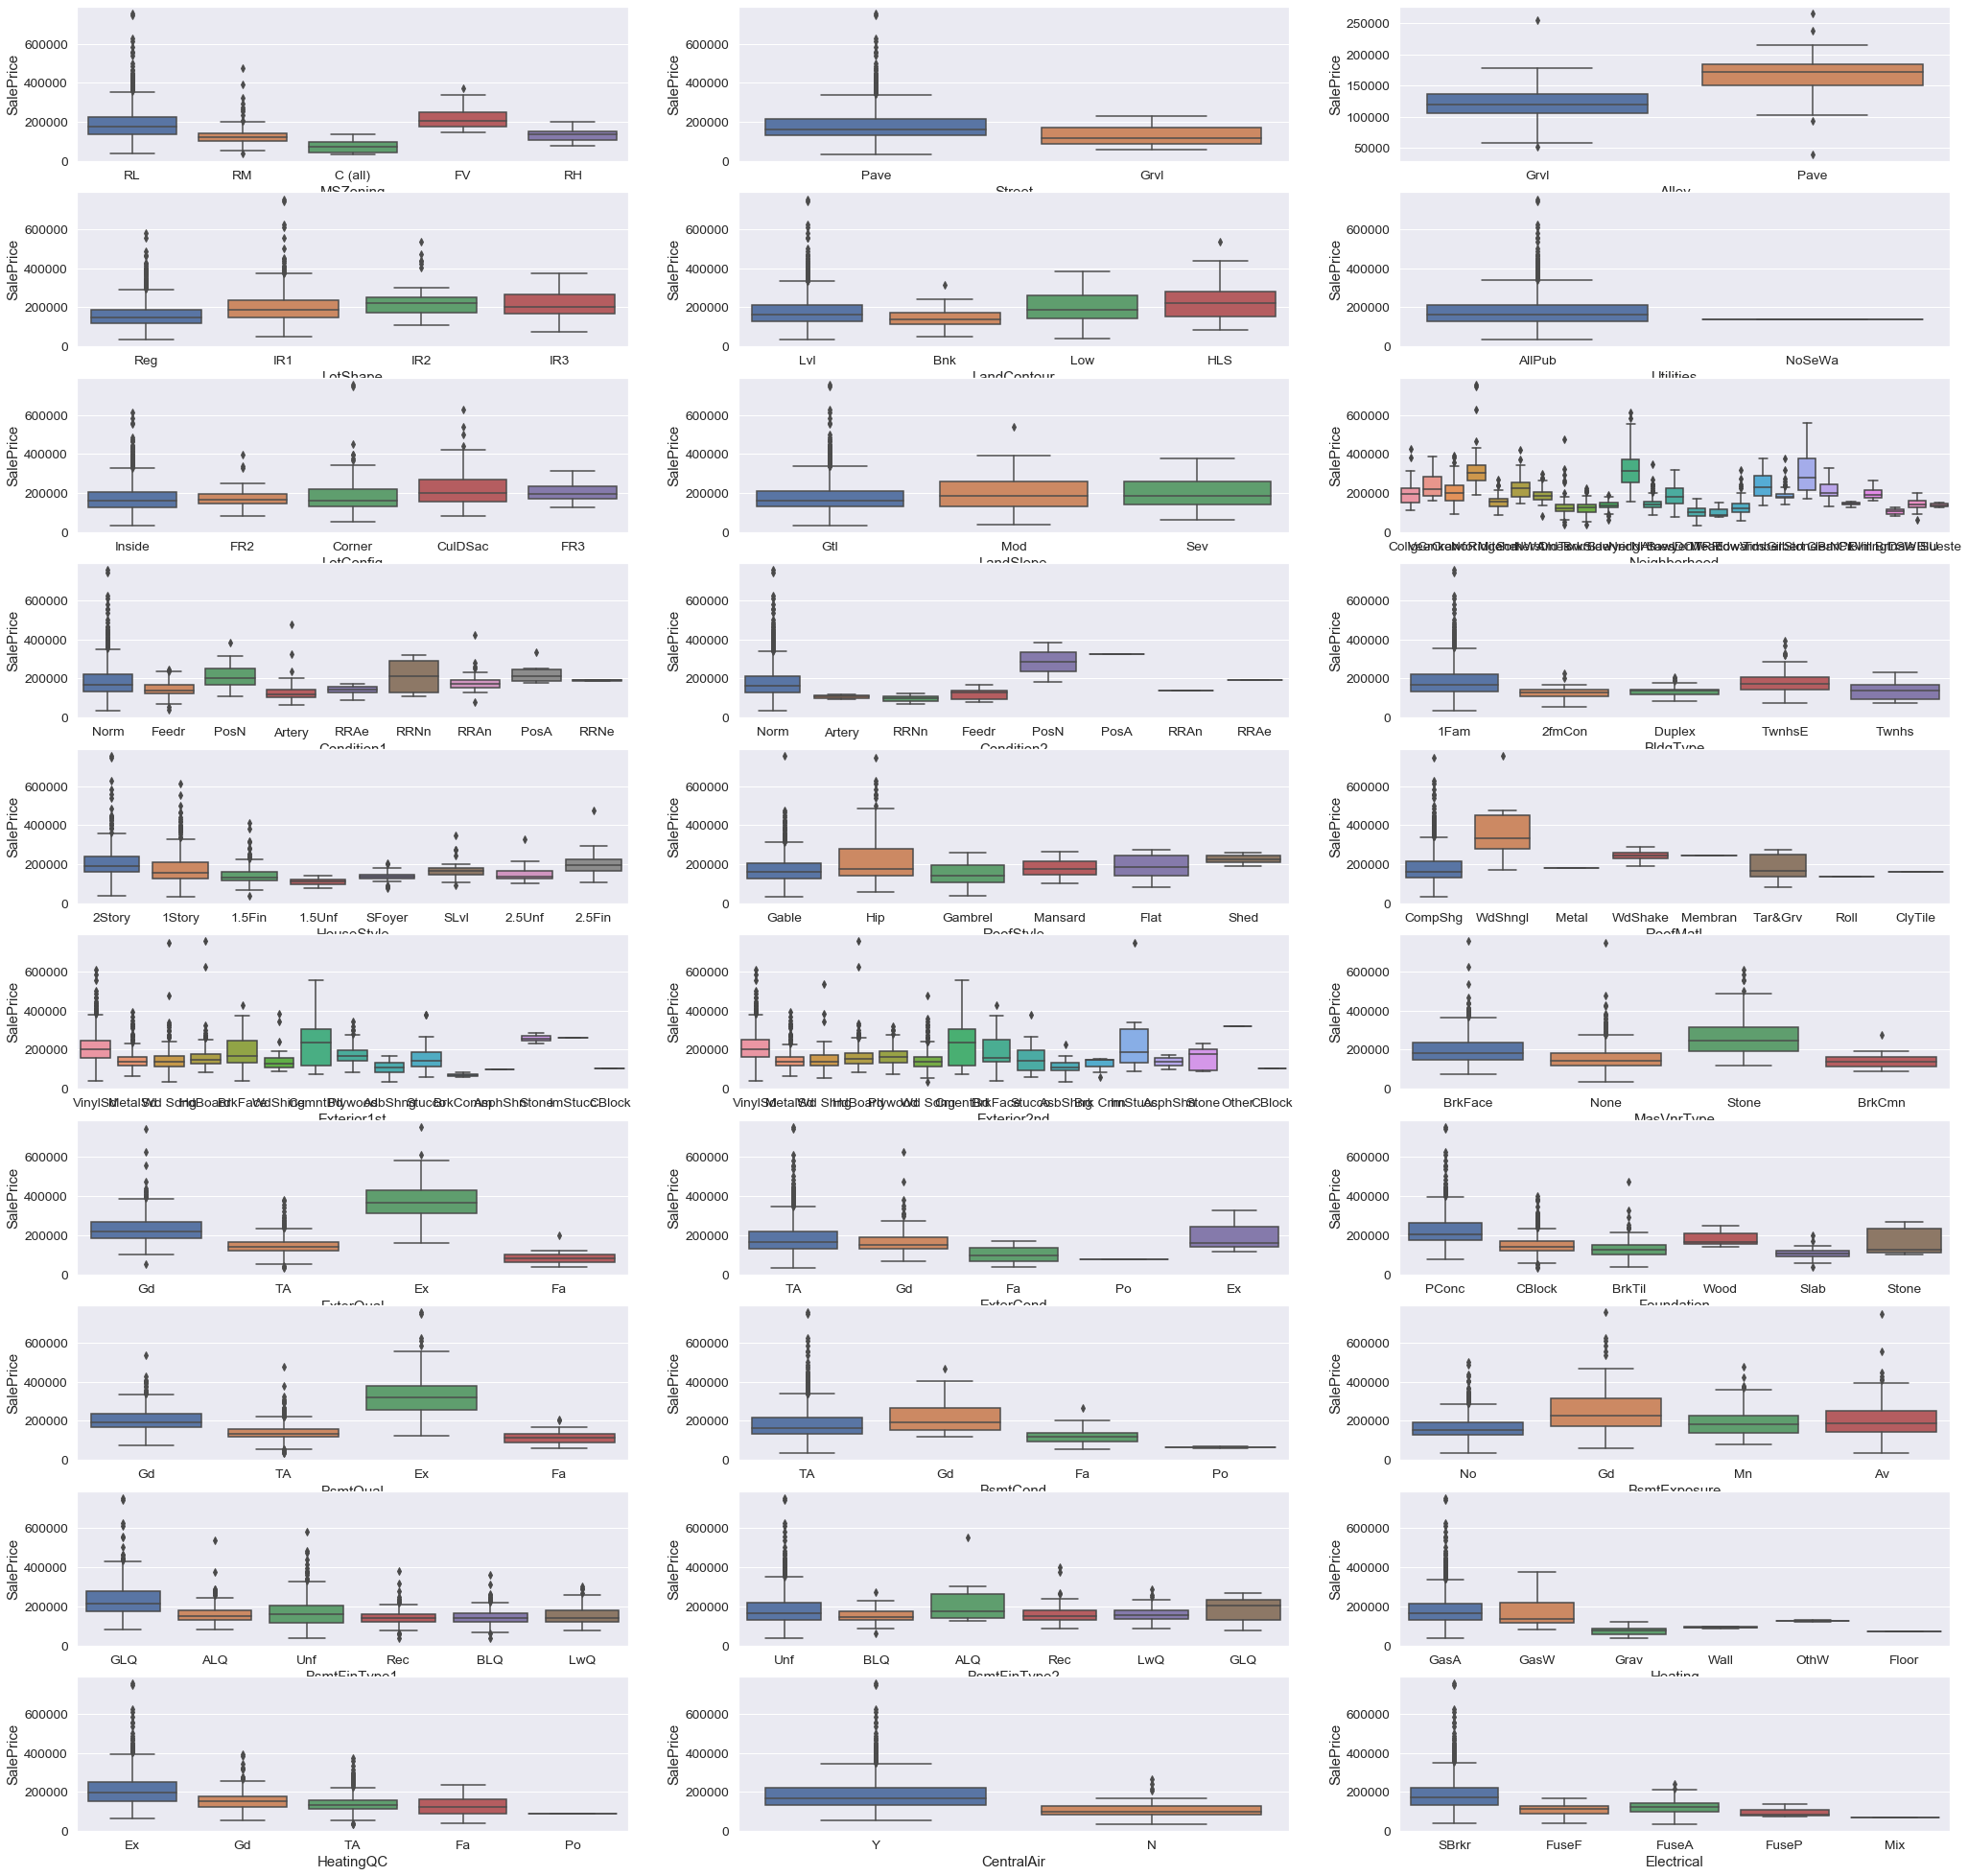

In [110]:
fig, ax = plt.subplots(10, 3, figsize=(35, 35))
for var, subplot in zip(categorical_features_train_df, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=train, ax=subplot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


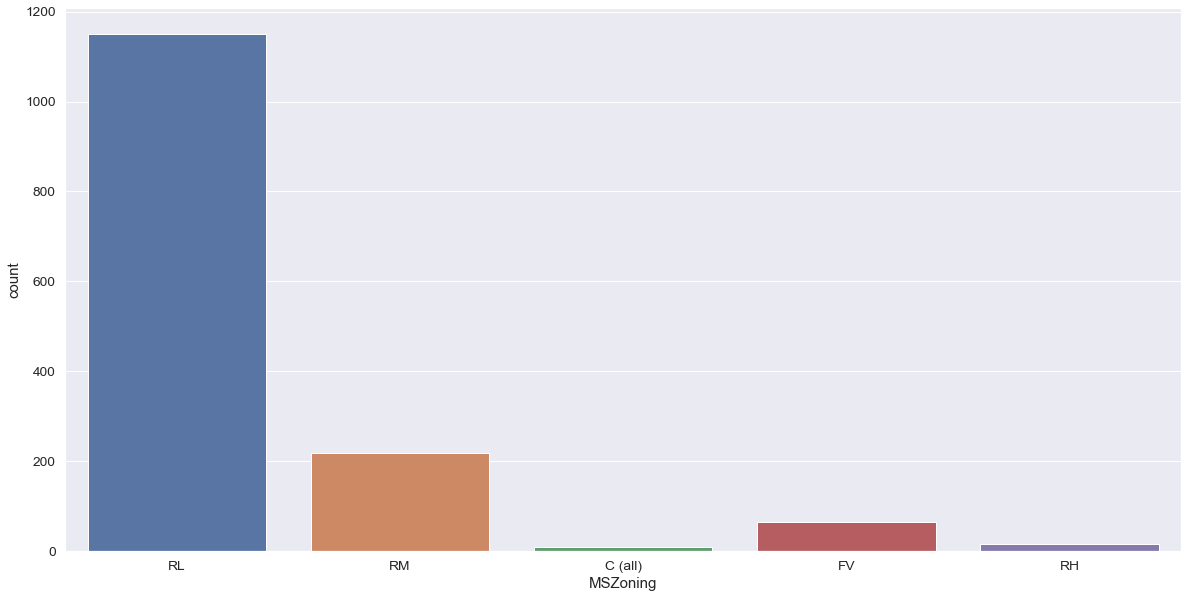

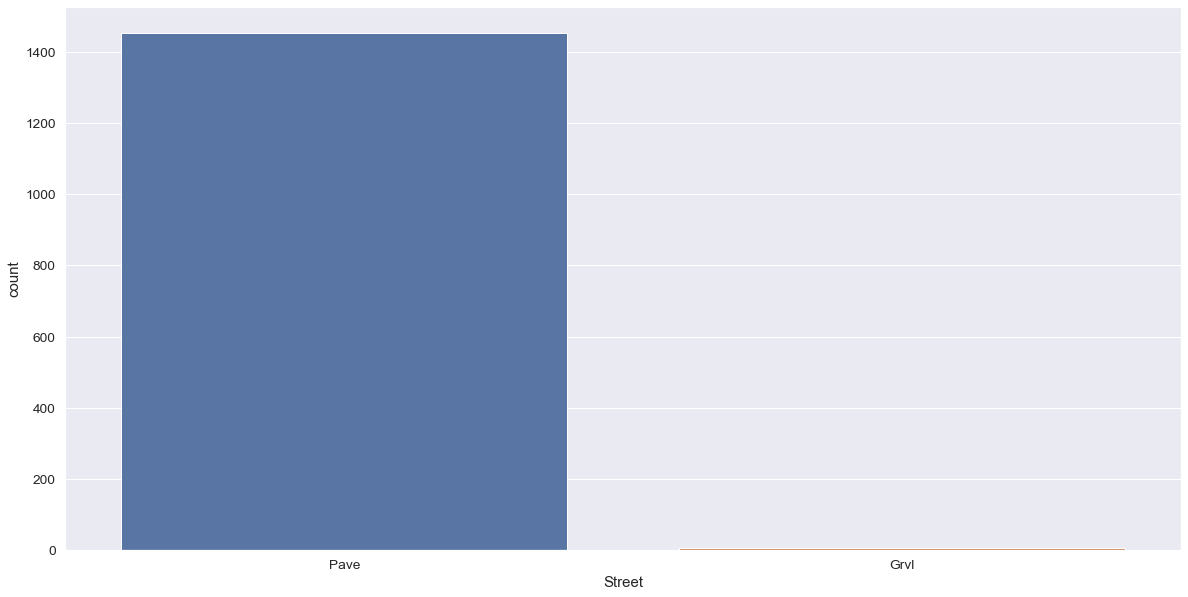

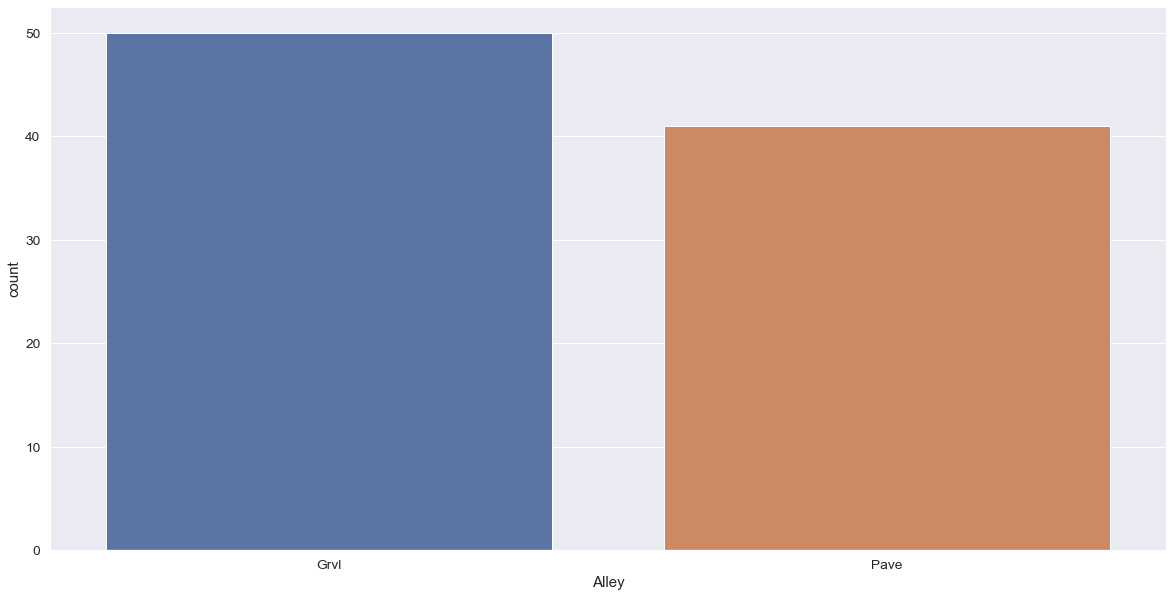

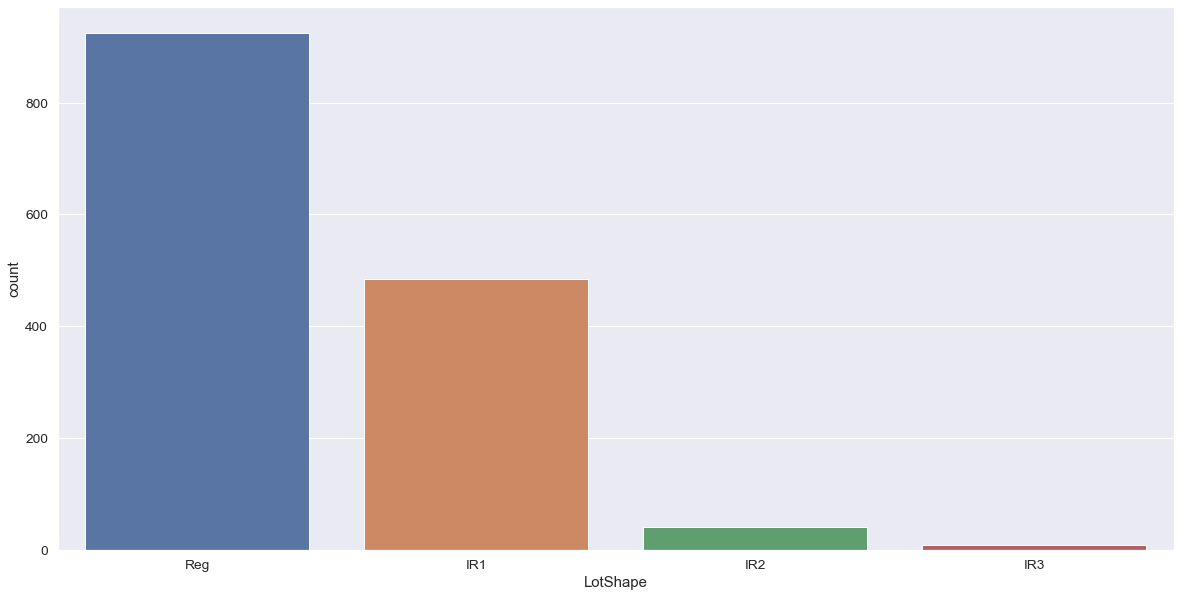

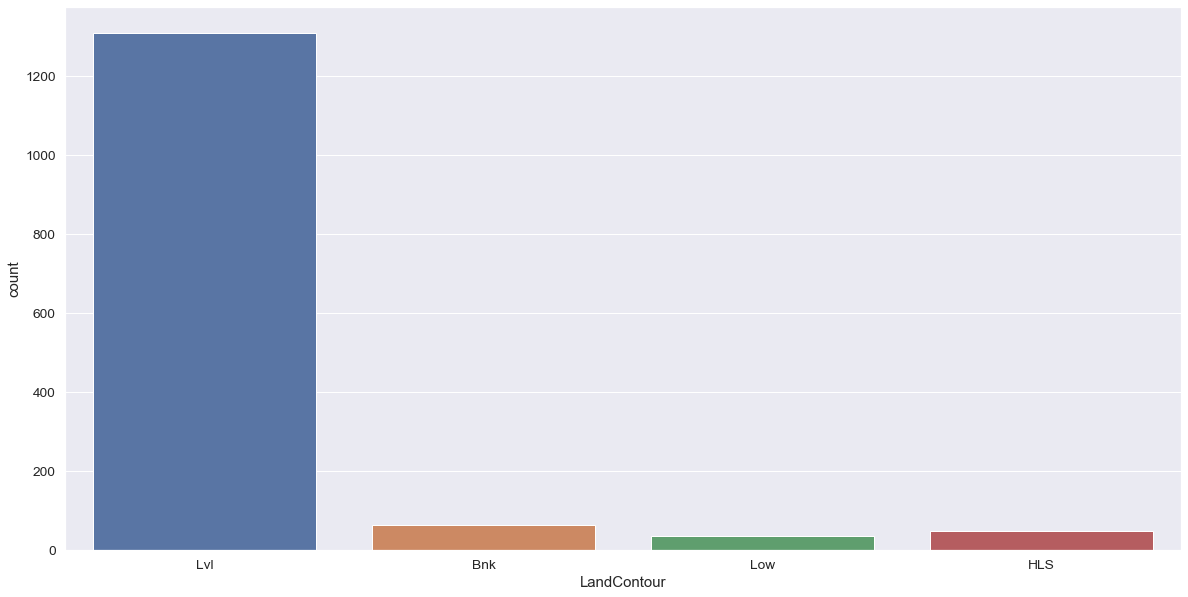

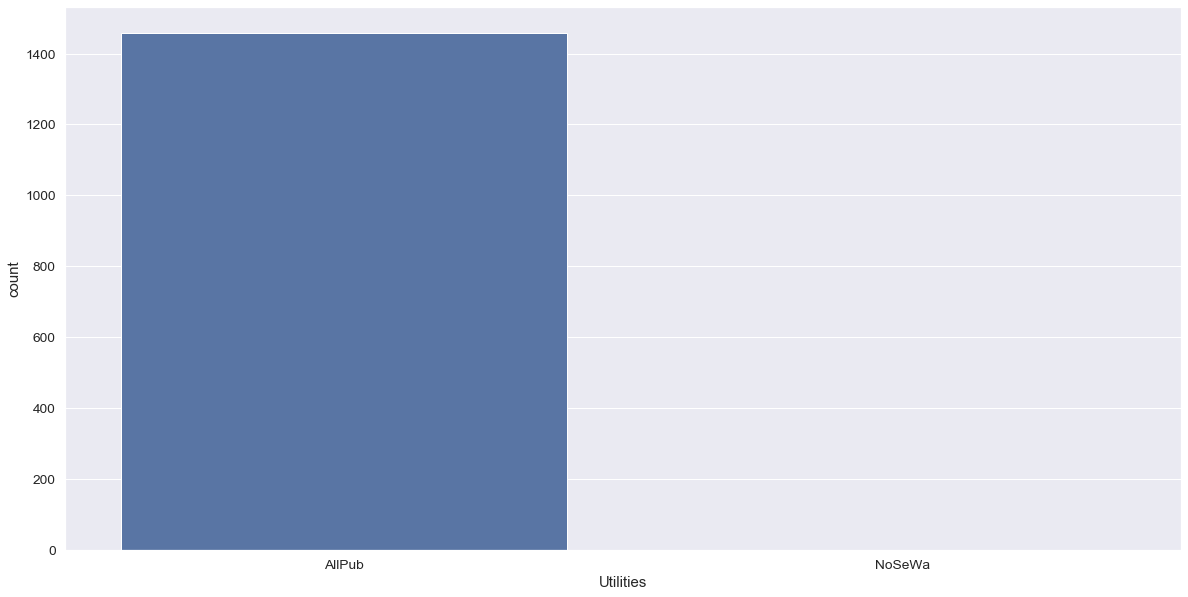

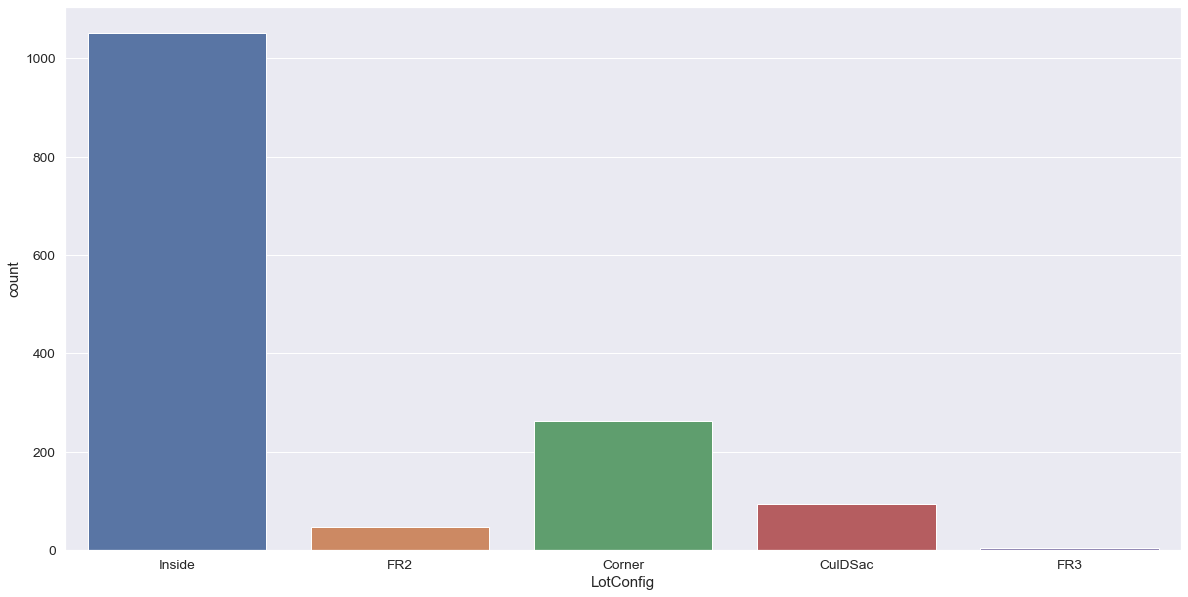

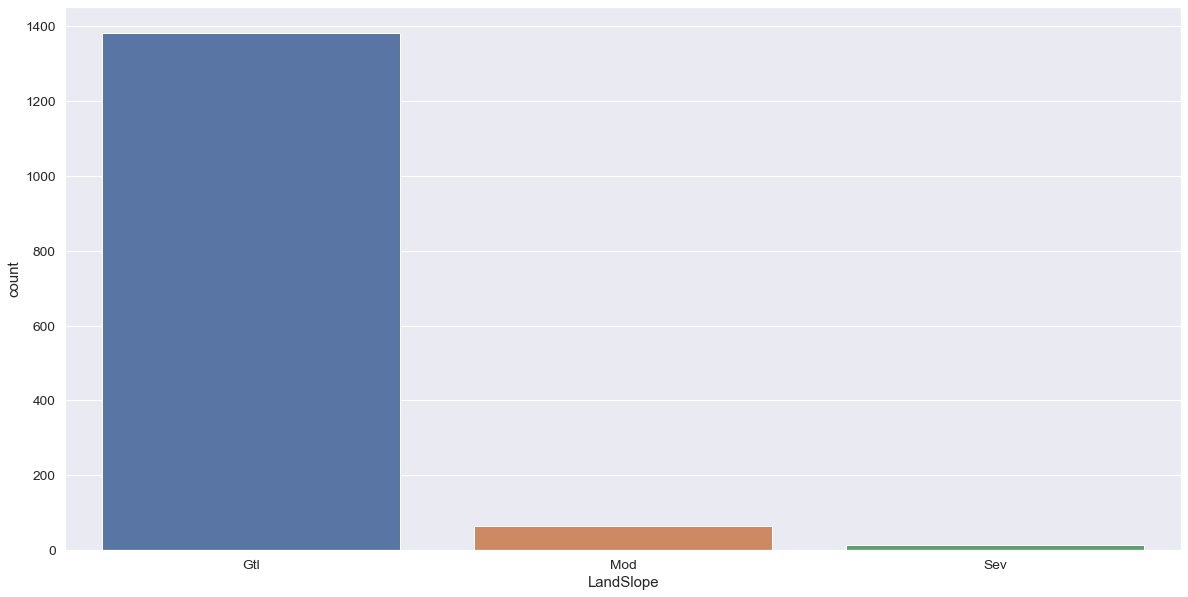

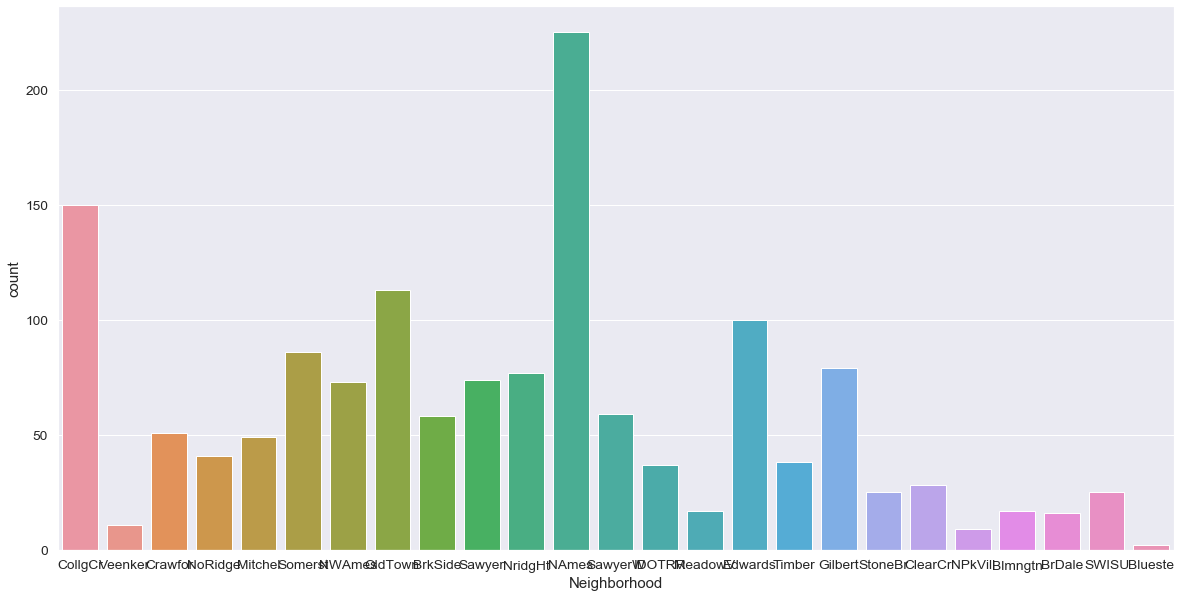

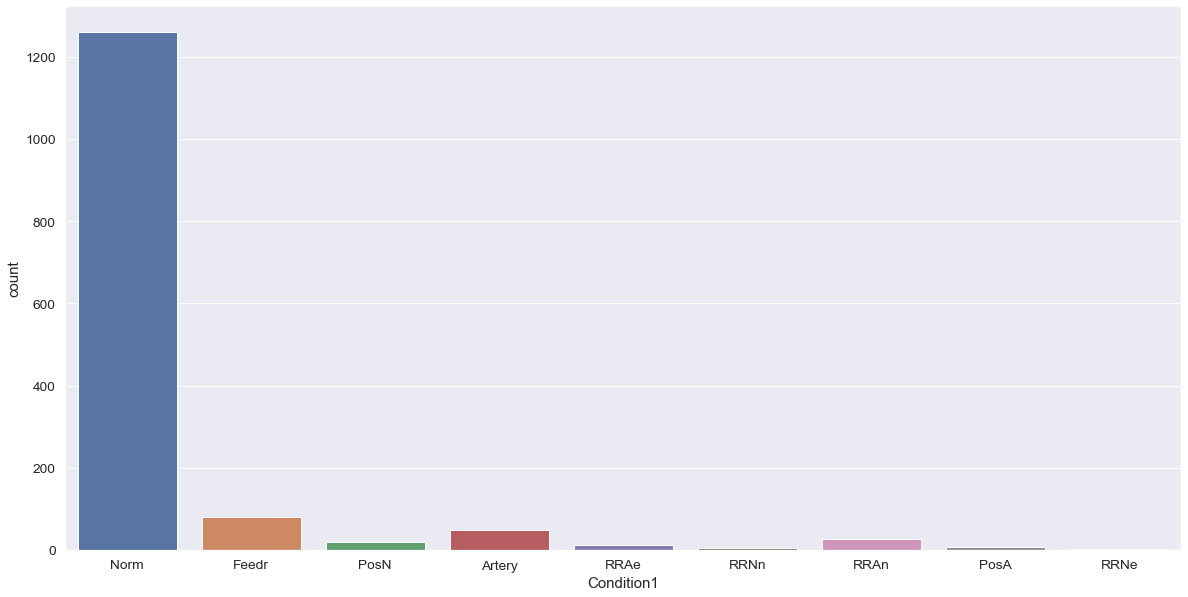

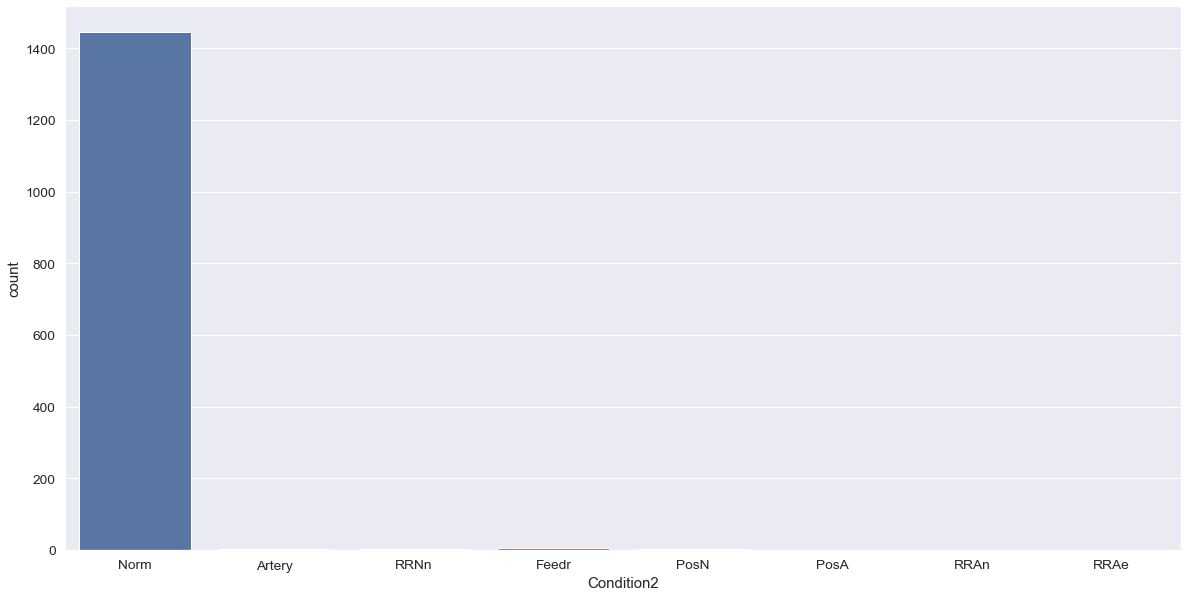

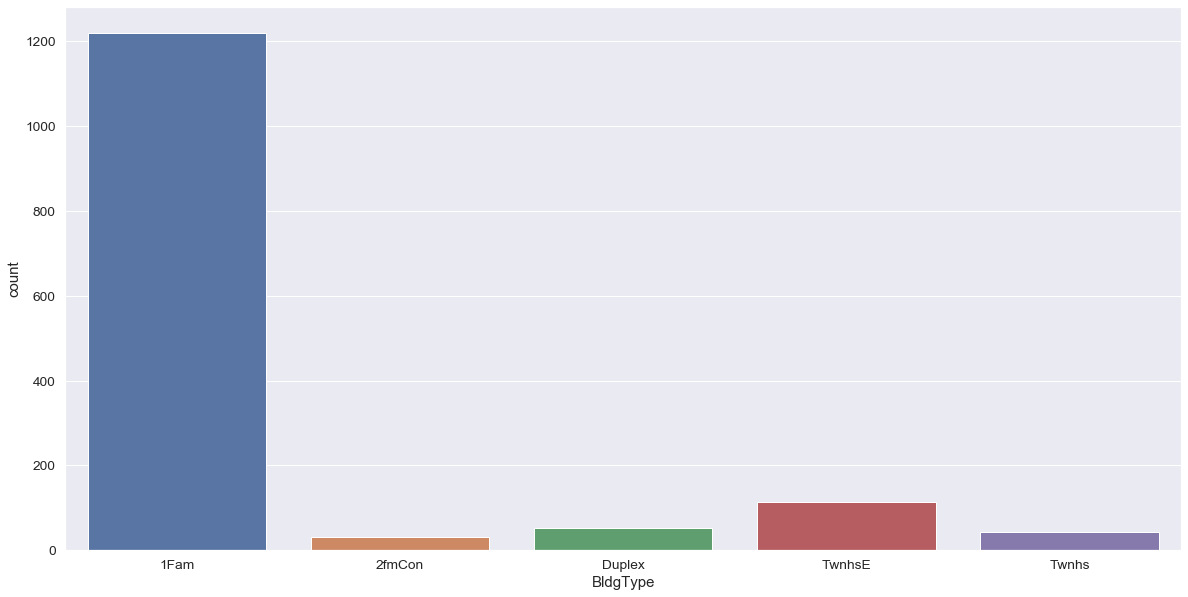

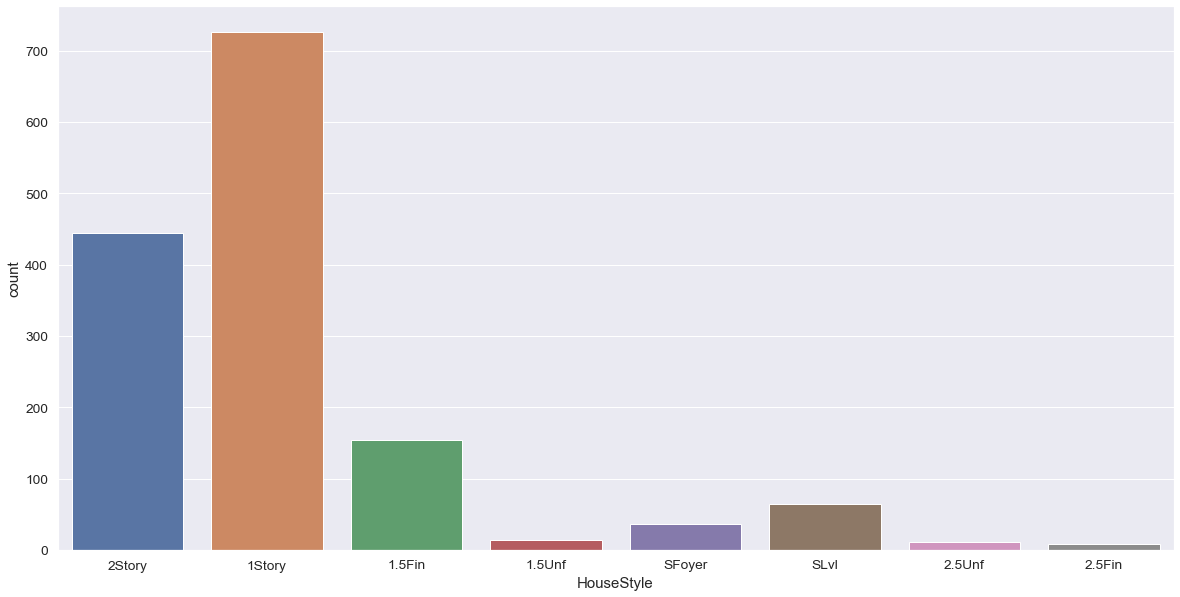

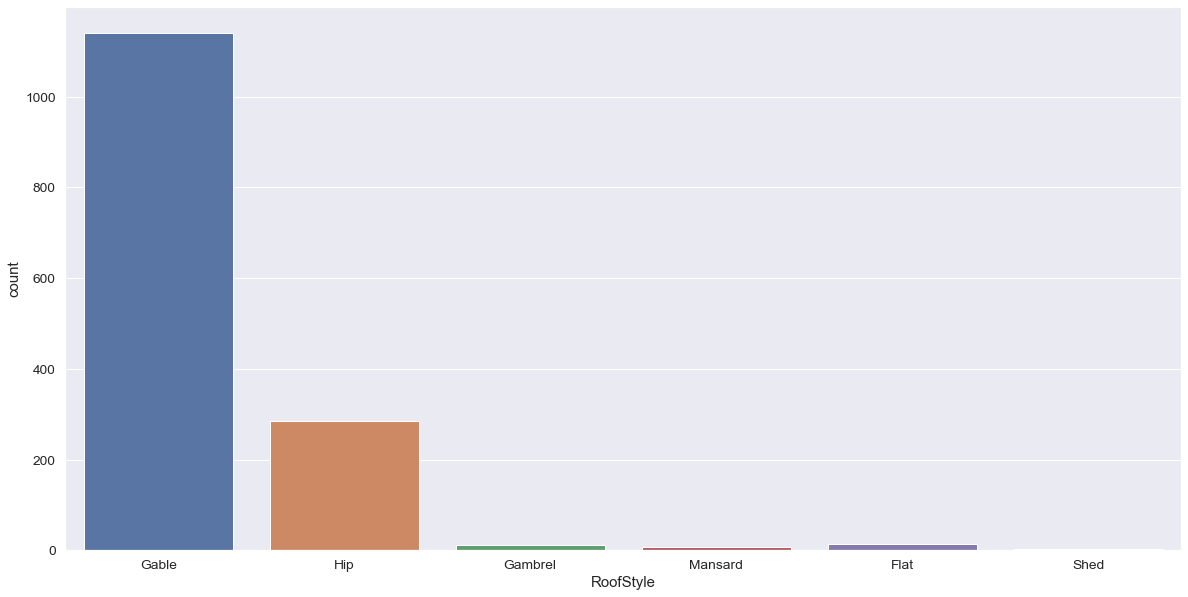

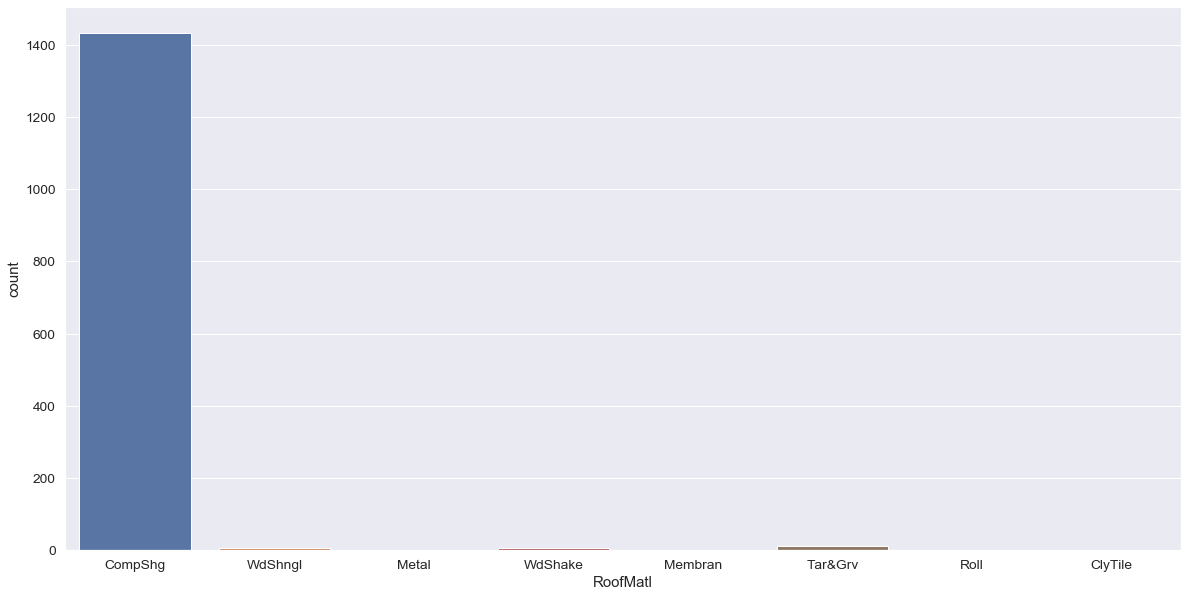

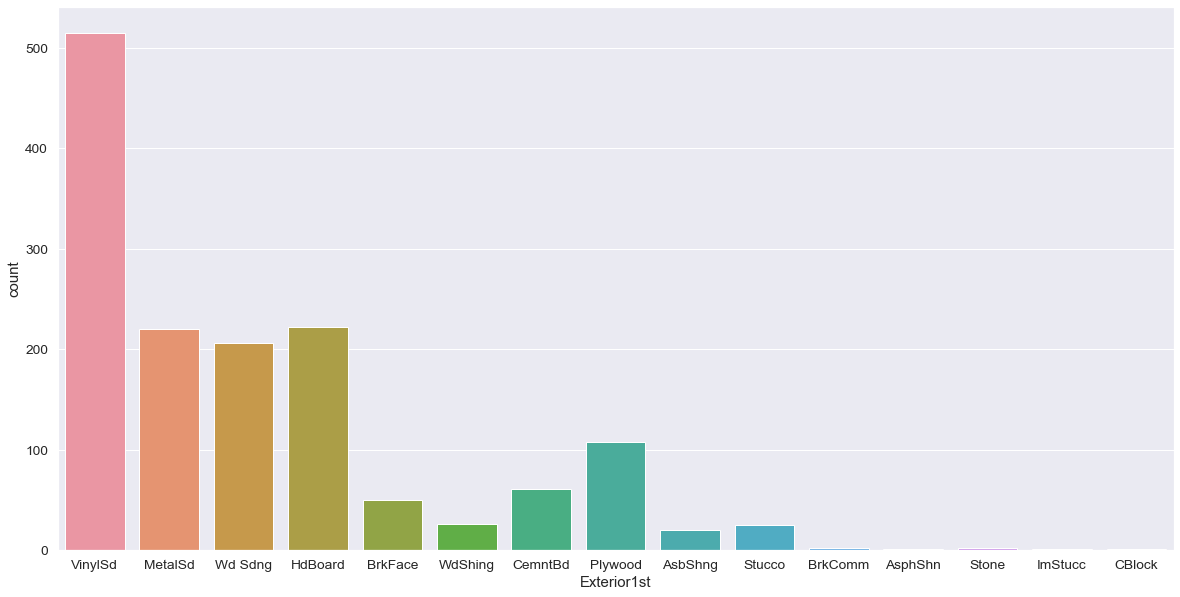

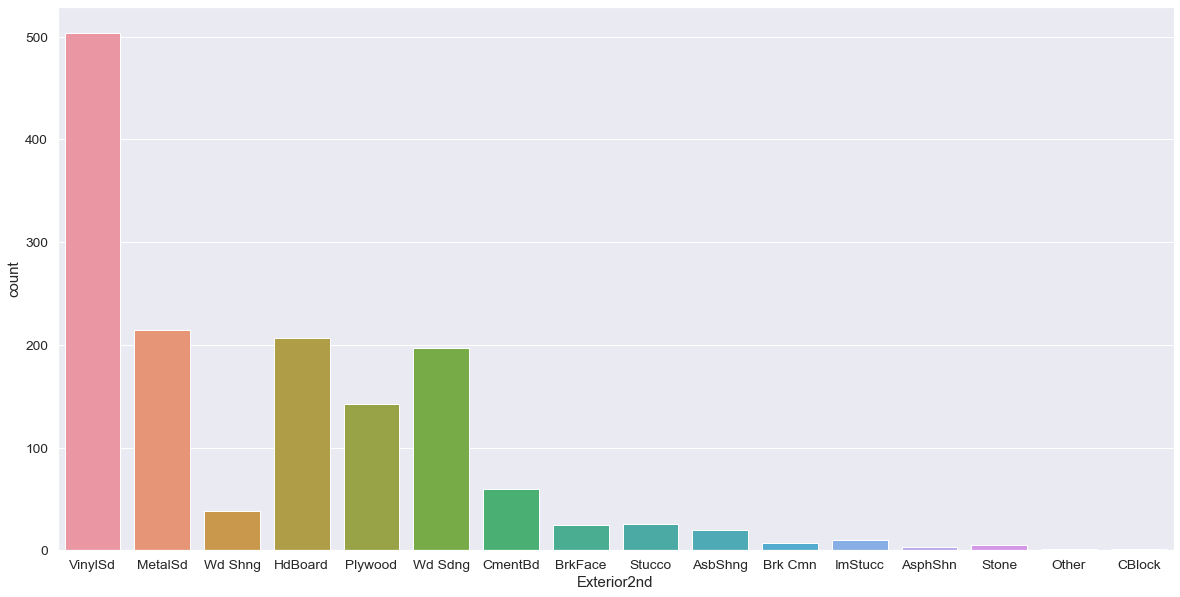

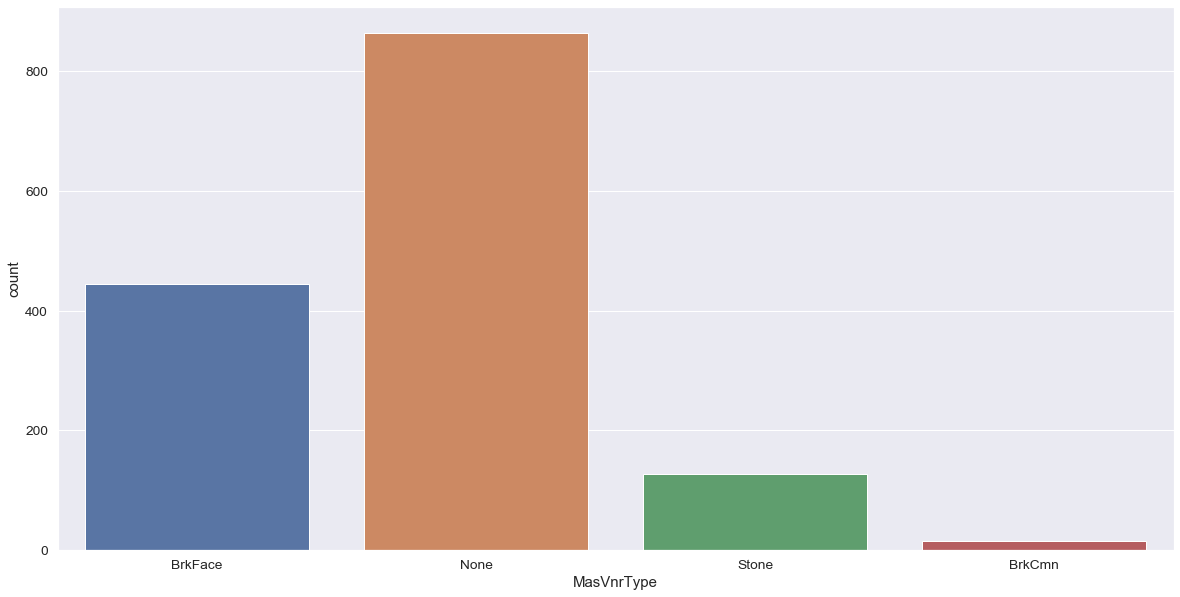

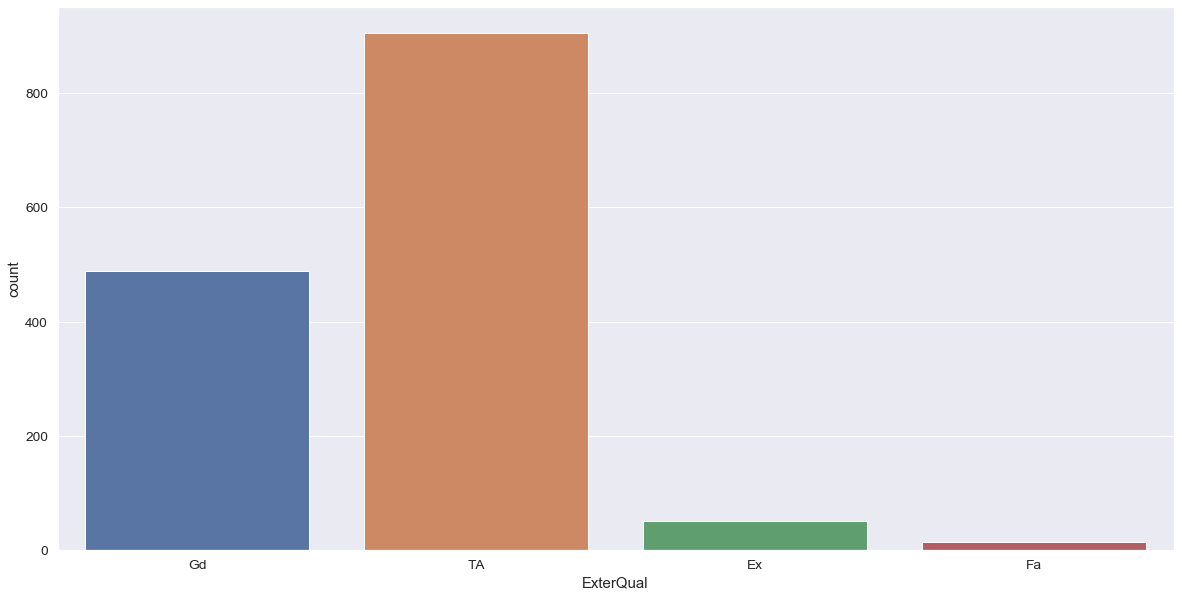

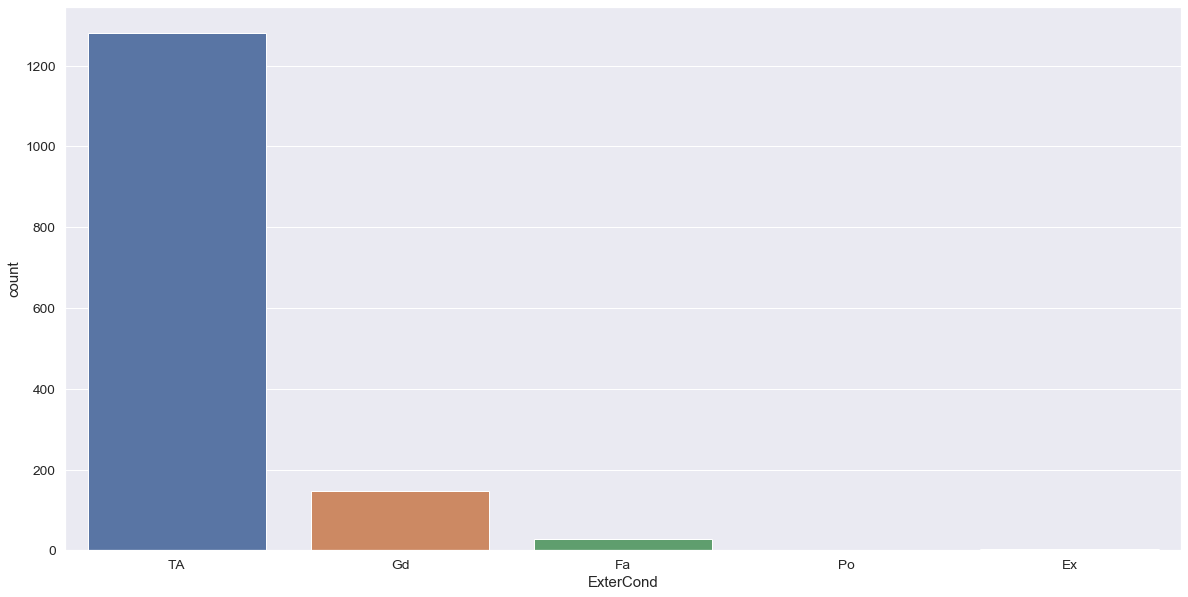

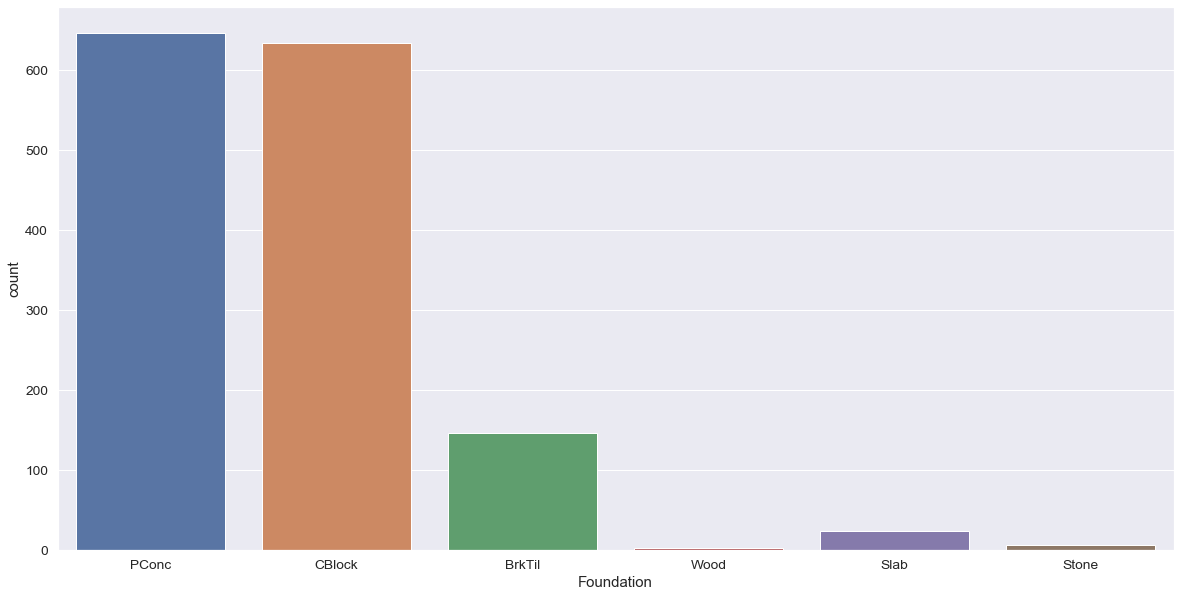

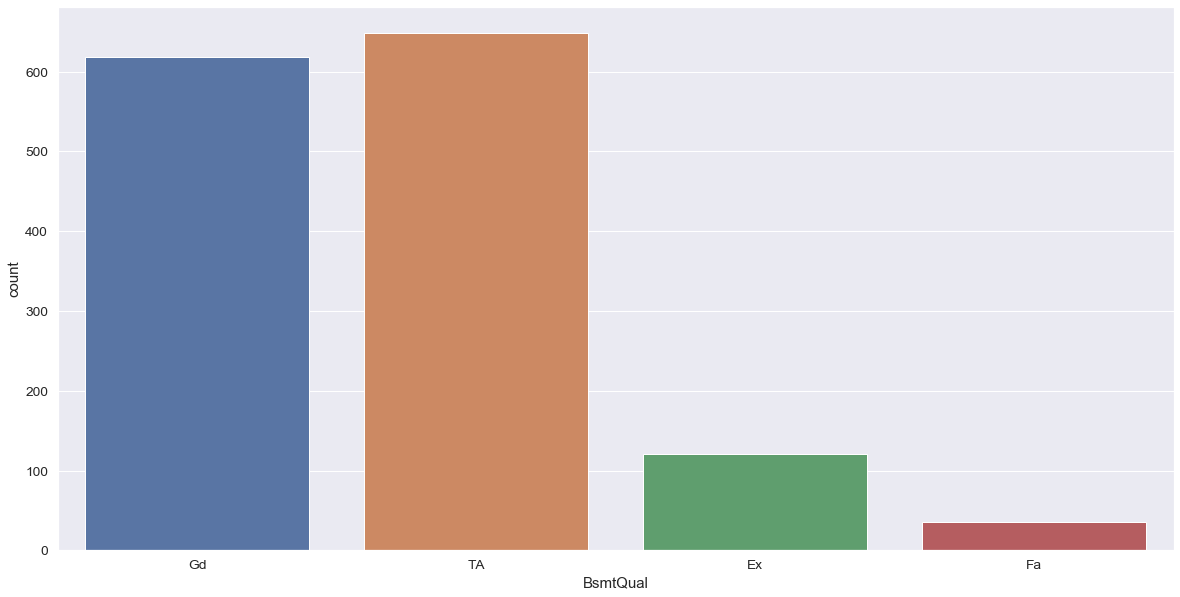

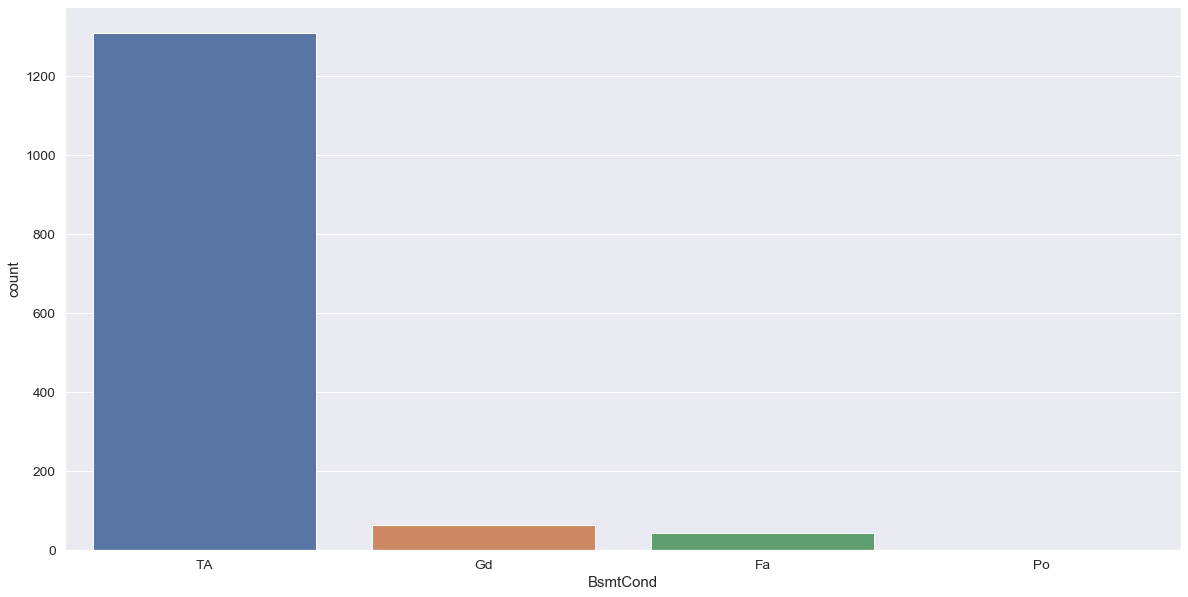

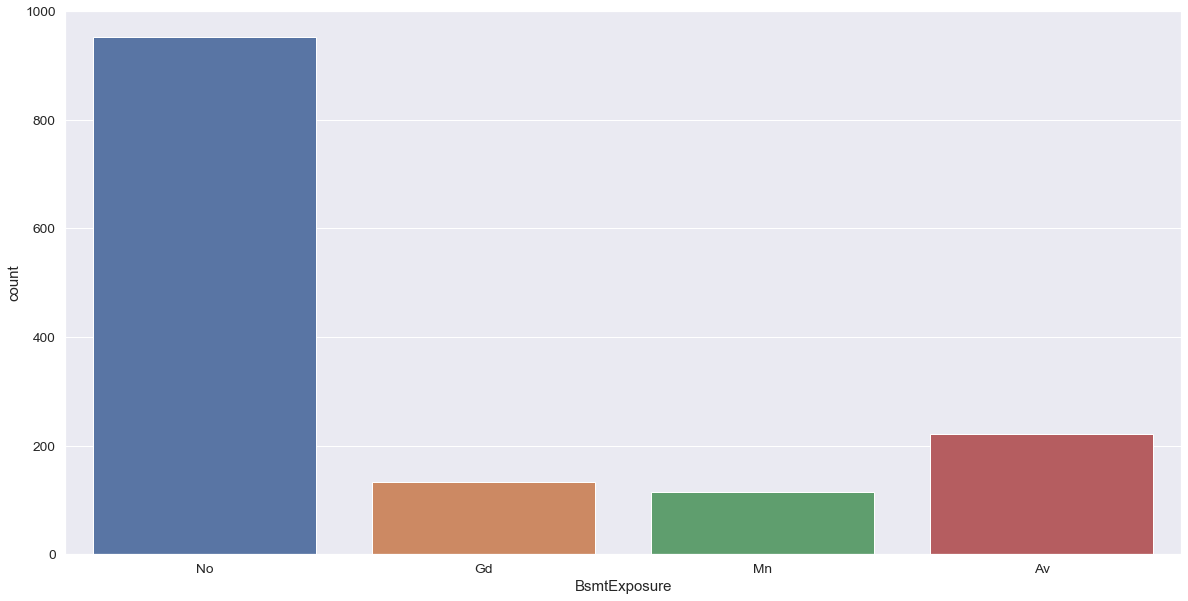

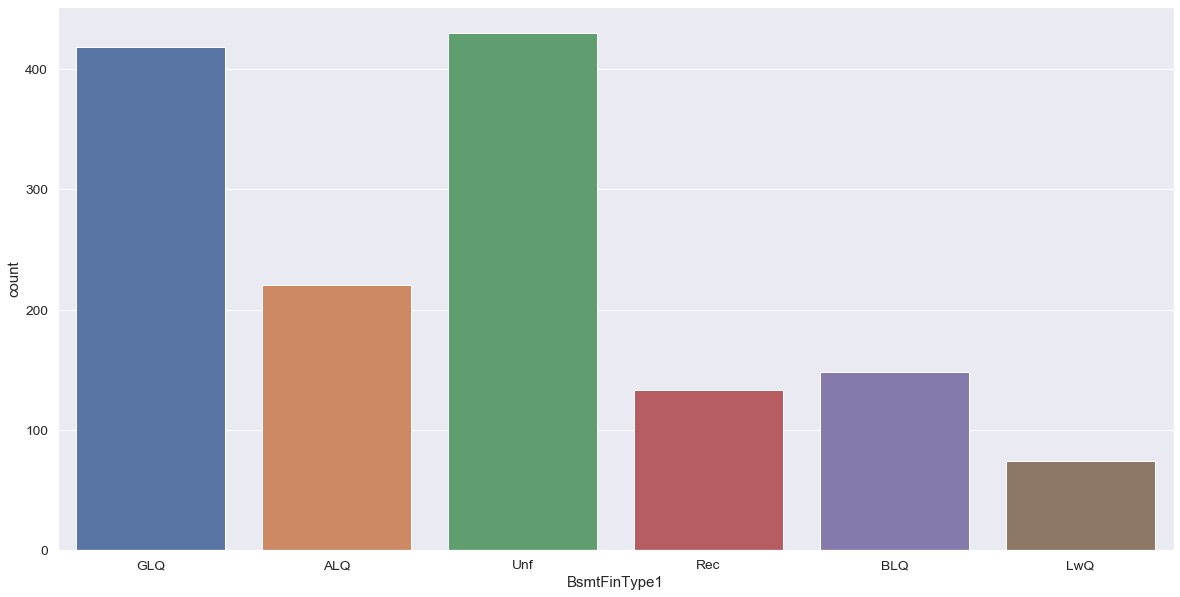

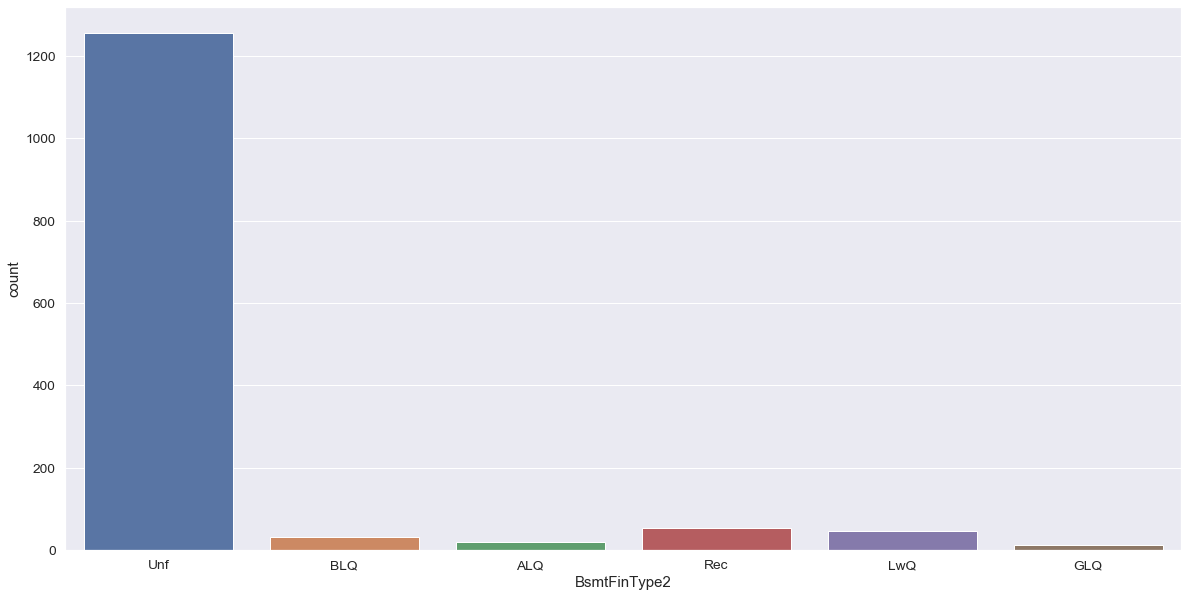

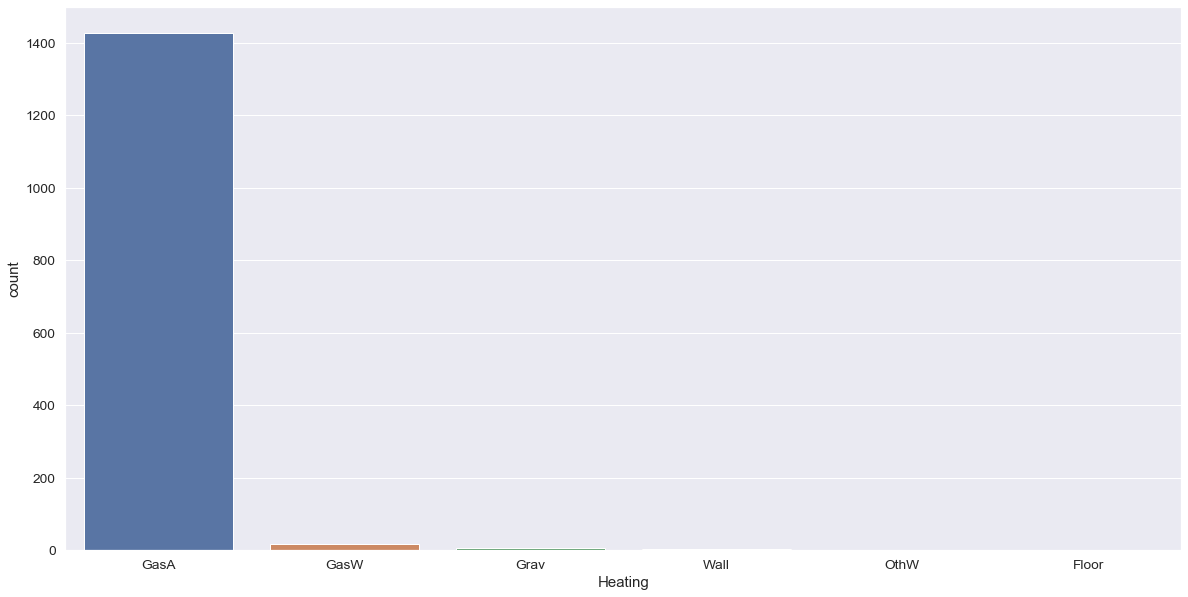

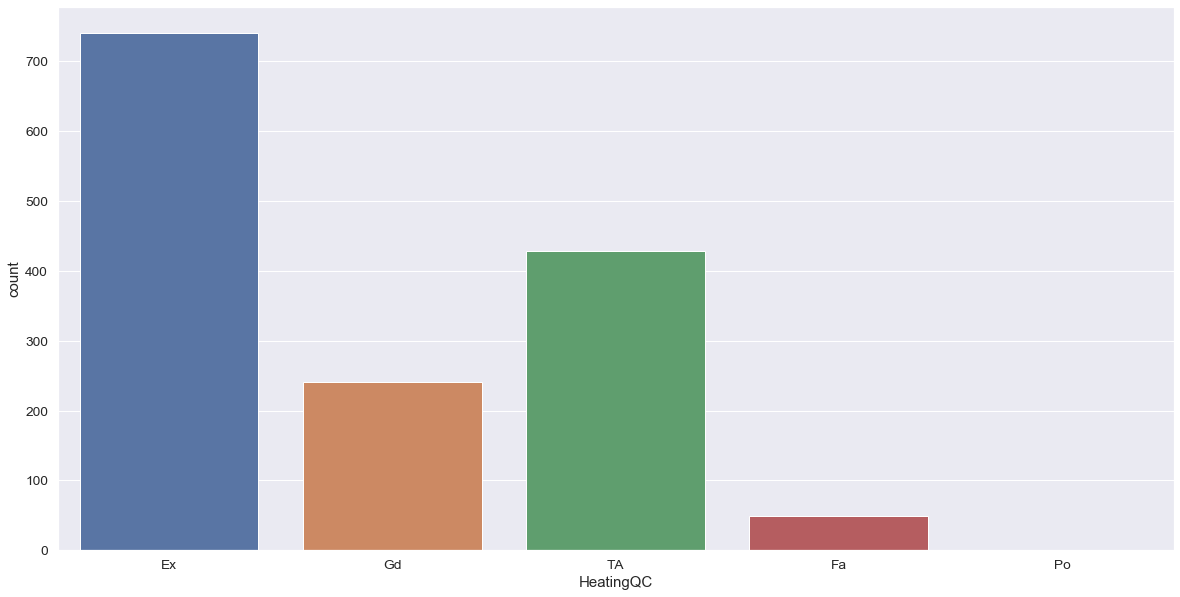

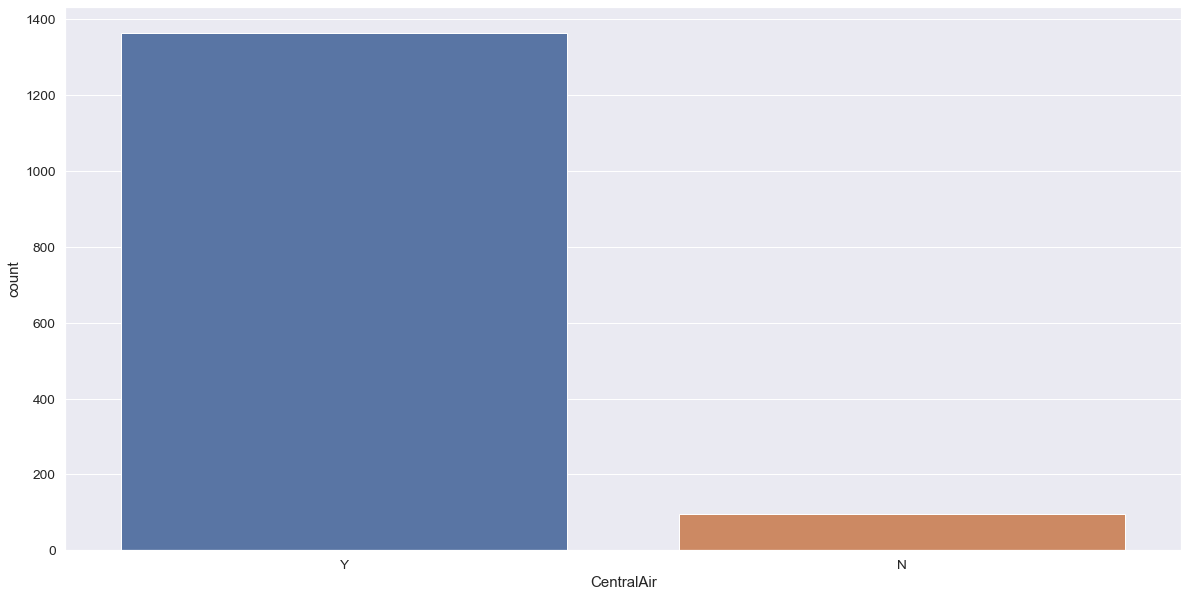

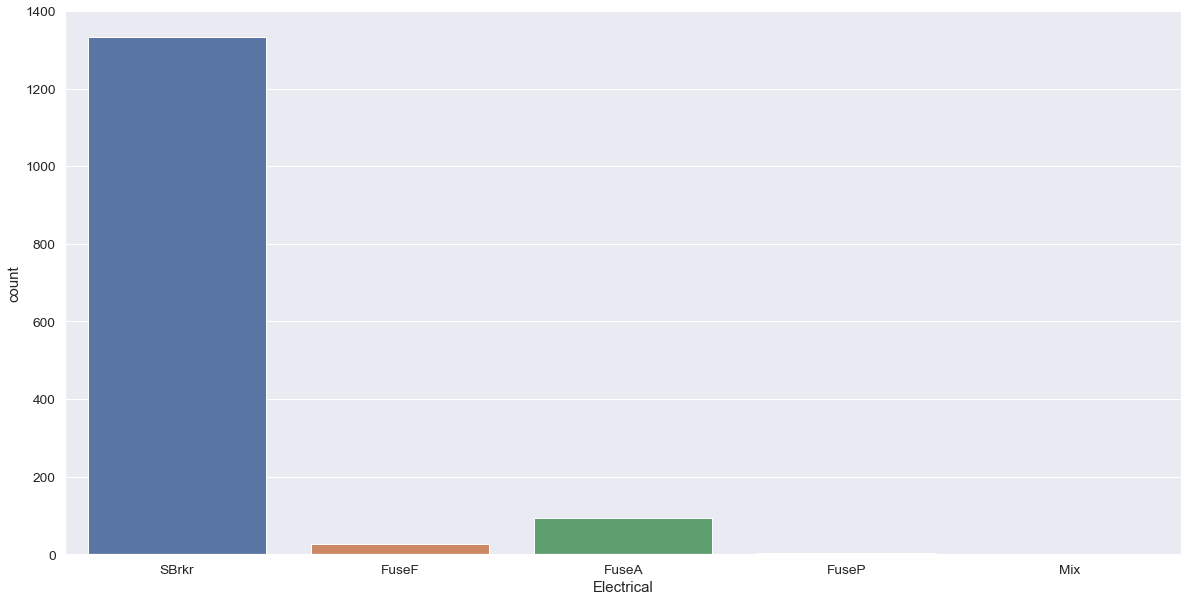

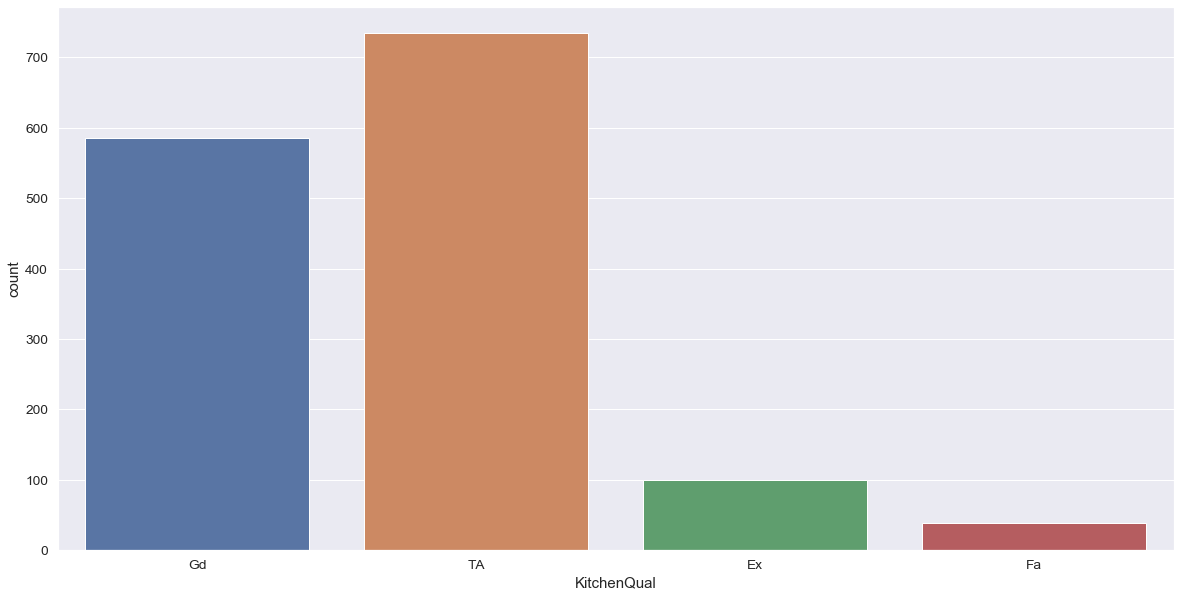

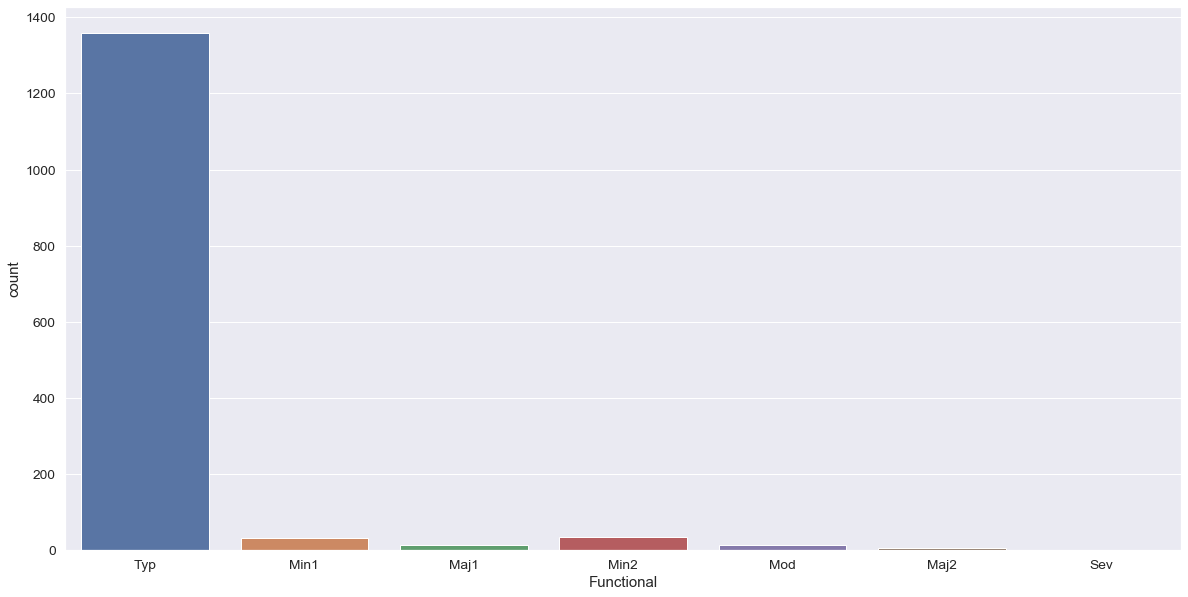

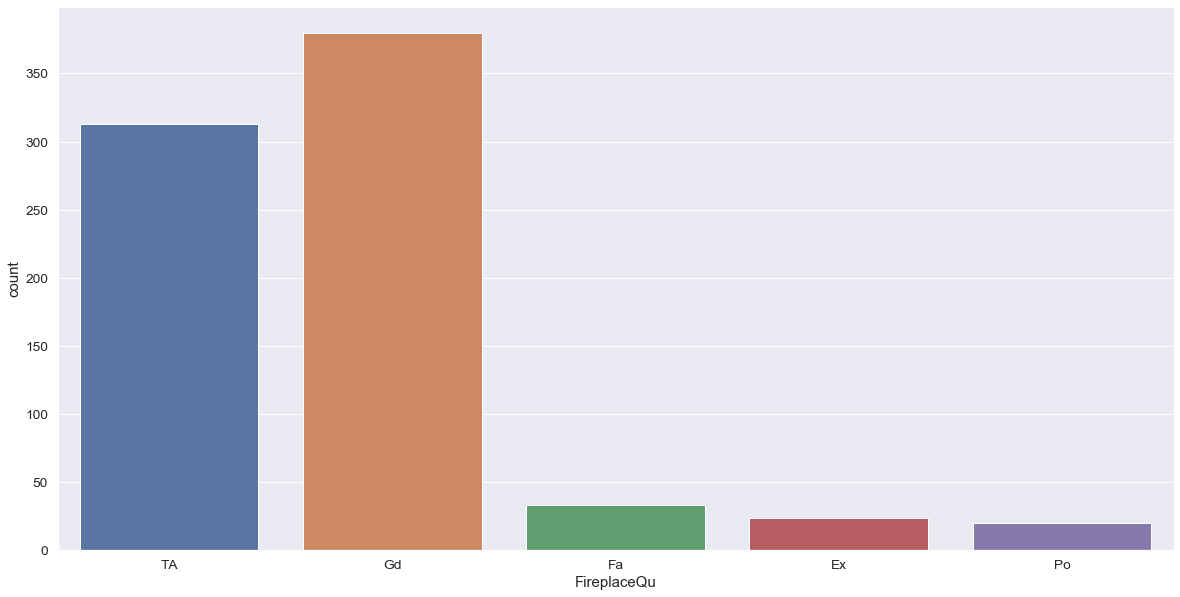

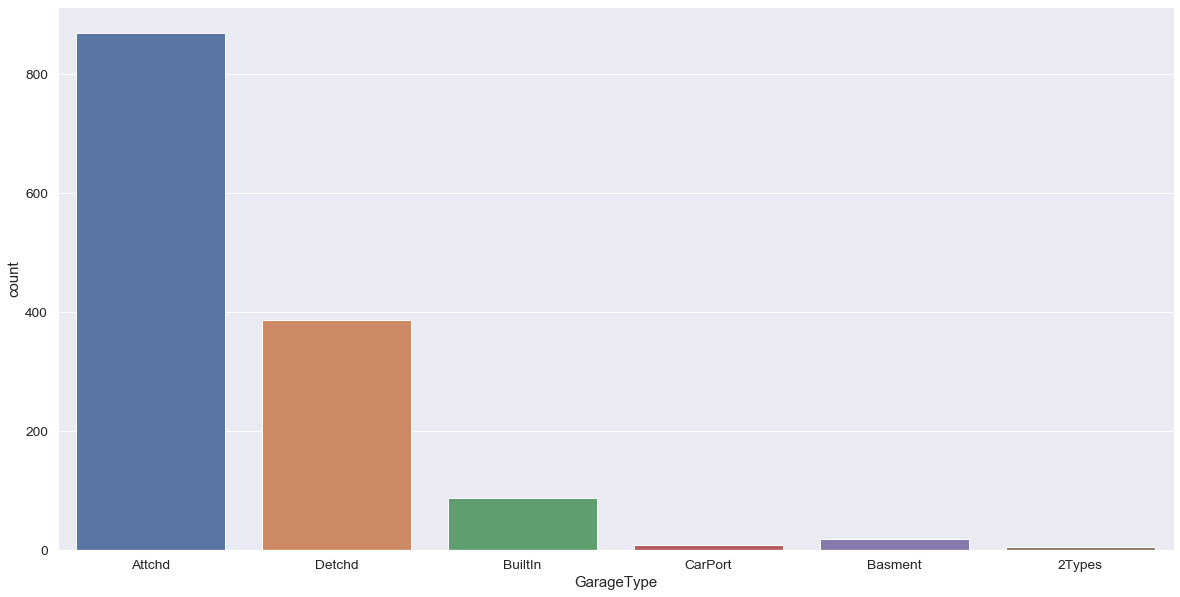

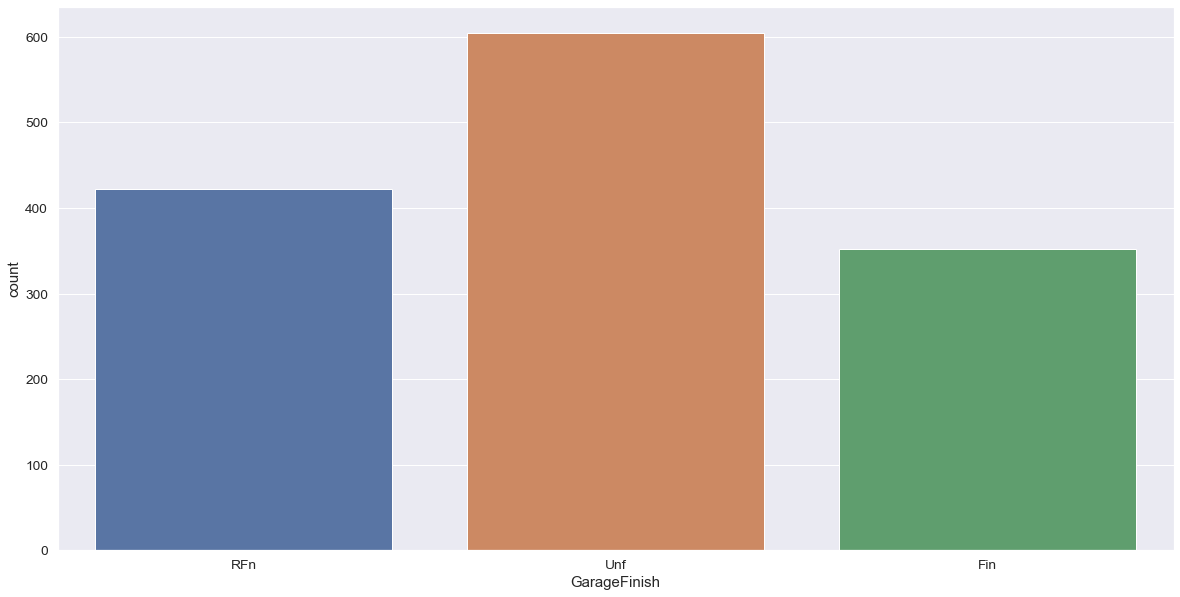

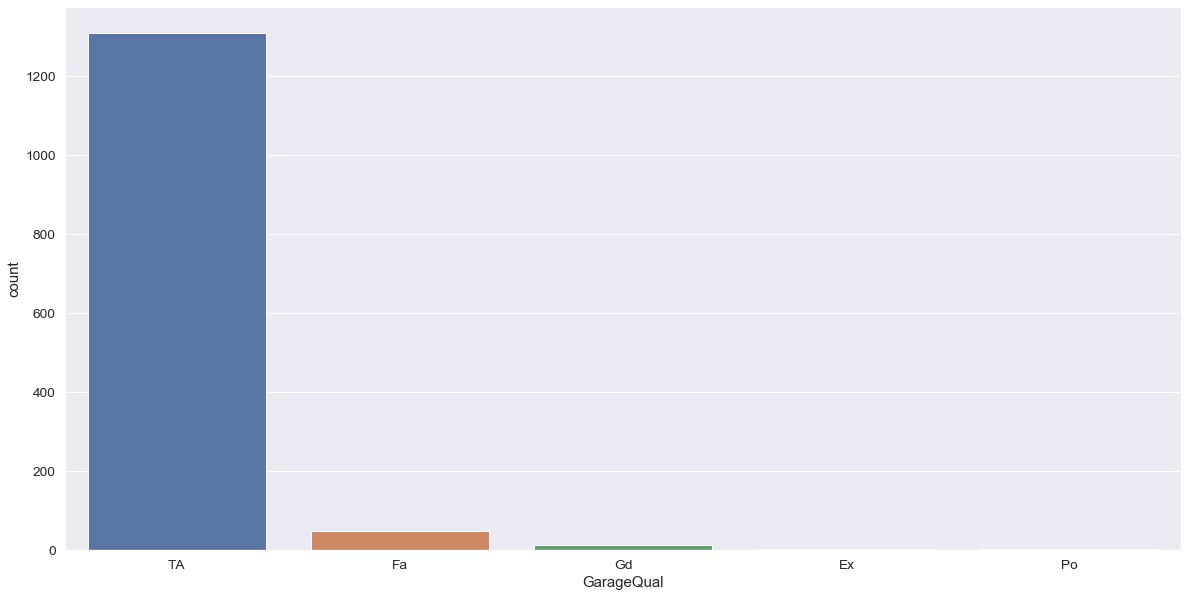

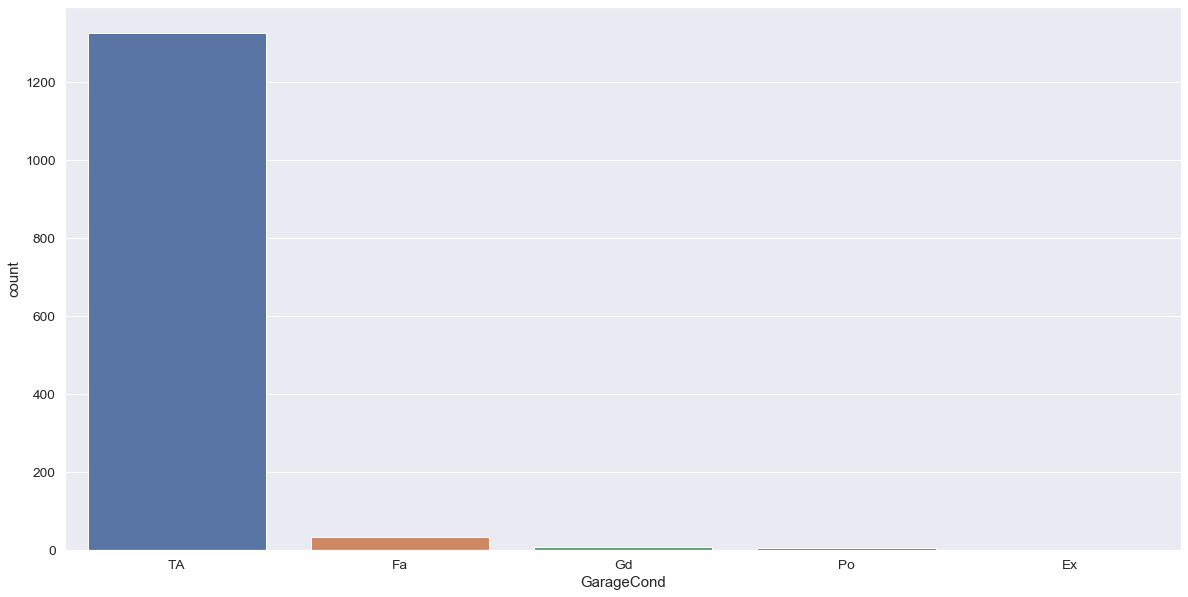

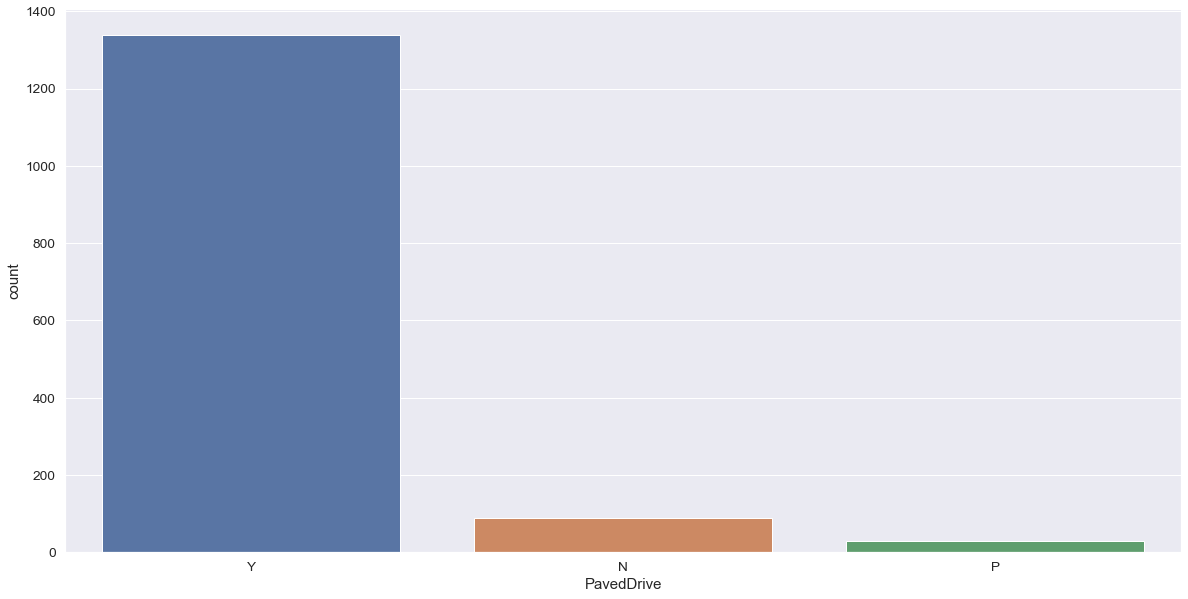

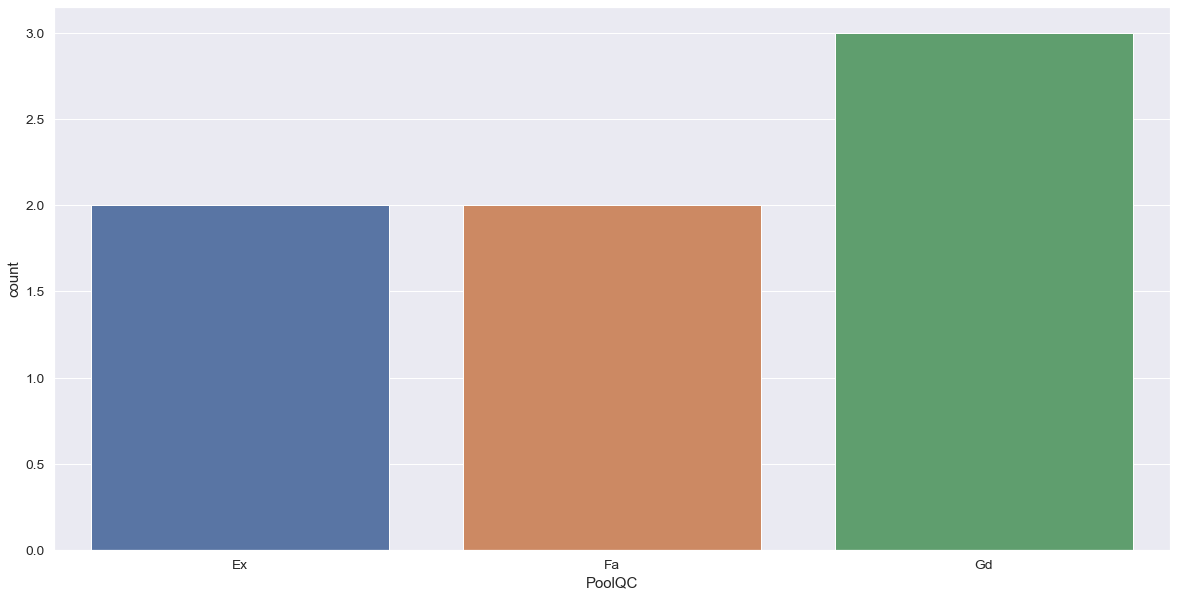

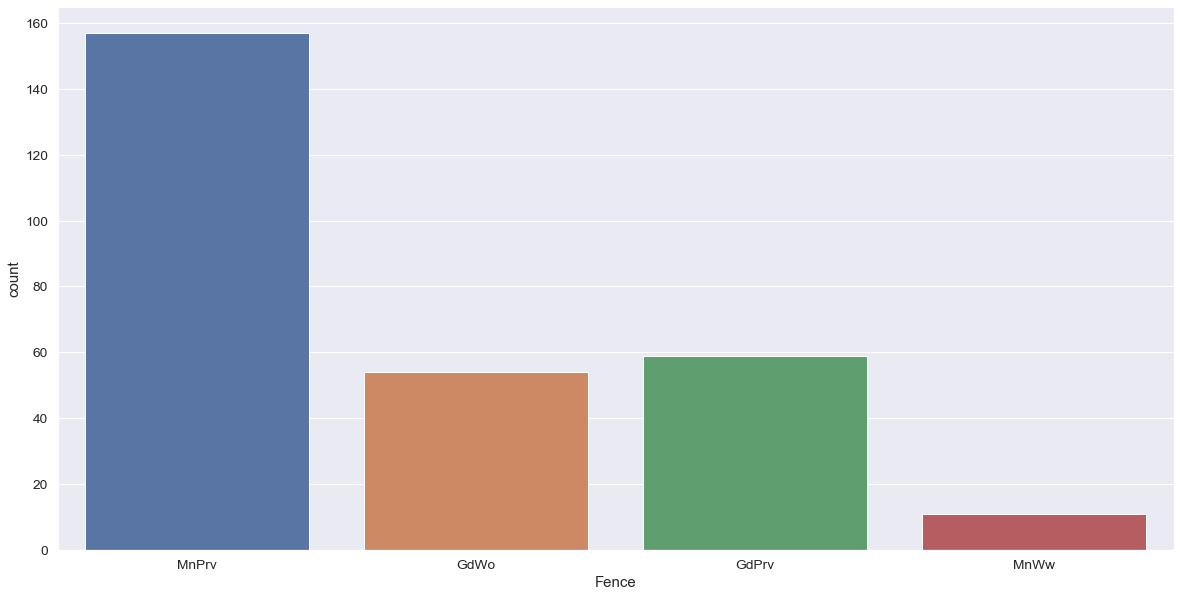

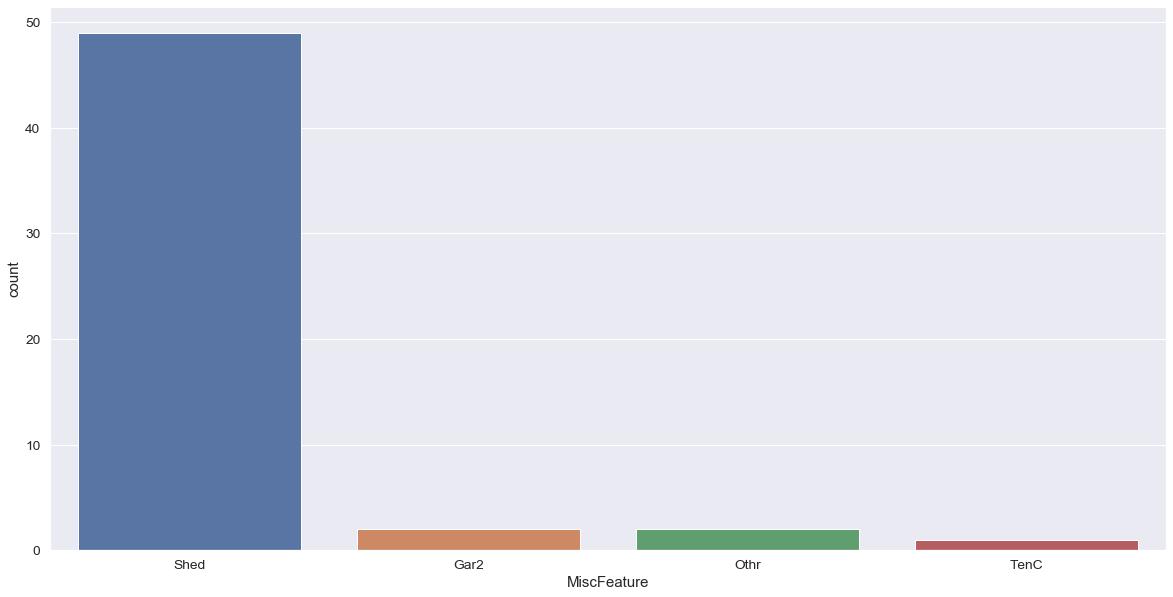

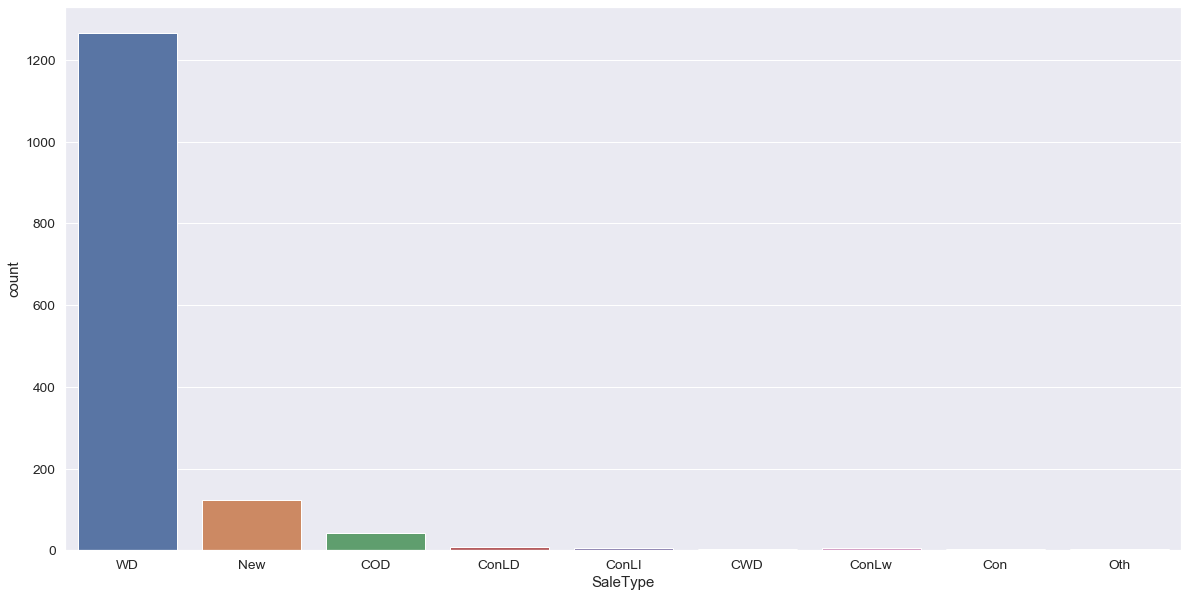

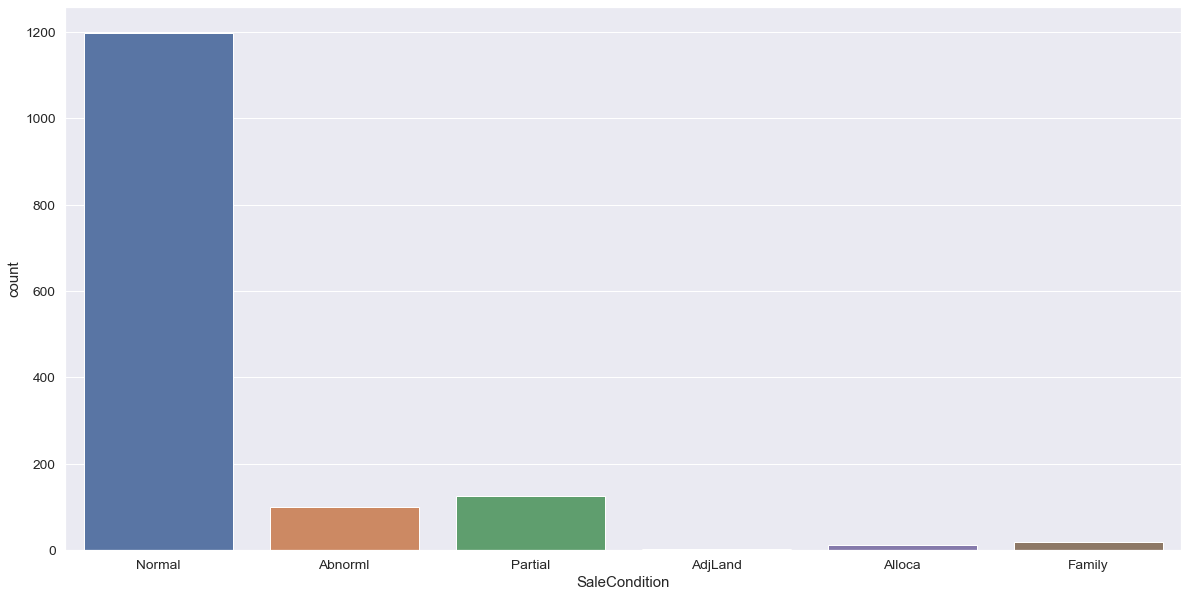

In [111]:
for x in list(categorical_features_train_df.columns):
    plt.figure(figsize=(20,10)) 
    sns.countplot(categorical_features_train_df[x]);

### Data Pre-Processing

In [112]:
y = train['SalePrice']

In [113]:
len(list(numerical_features_train_df.columns))

38

In [114]:
numerical_features_train_df.columns.get_loc('SalePrice')

37

In [115]:
numerical_features_train_df.drop(numerical_features_train_df.columns[[37]], axis = 1, inplace = True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [116]:
len(list(numerical_features_train_df.columns))

37

In [117]:
numerical_features_train_df.isnull().any()

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_features_train_df['LotFrontage'] = imputer.fit_transform(numerical_features_train_df[['LotFrontage']])
numerical_features_train_df['MasVnrArea'] = imputer.fit_transform(numerical_features_train_df[['MasVnrArea']])
numerical_features_train_df['GarageYrBlt'] = imputer.fit_transform(numerical_features_train_df[['GarageYrBlt']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [120]:
numerical_features_train_df.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [121]:
numerical_features_train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,548,0,61,0,0.0,0,0.0,0.0,2,2008
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,460,298,0,0,0.0,0,0.0,0.0,5,2007
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,608,0,42,0,0.0,0,0.0,0.0,9,2008
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,642,0,35,272,0.0,0,0.0,0.0,2,2006
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,836,192,84,0,0.0,0,0.0,0.0,12,2008


In [122]:
numerical_features_train_df.isnull().sum().sum()

0

In [126]:
categorical_features_train_df.isnull().sum().sum()

6617

In [127]:
for i in categorical_features_train_df:
    print(categorical_features_train_df[i]g)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [128]:
categorical_features_train_df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [129]:
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [130]:
ordinal_features_df = train[ordinal_features]

In [131]:
ordinal_features_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN


In [132]:
ordinal_features_df.isnull().sum().sum()

2379

In [133]:
ordinal_features_df.fillna('UNKNOWN', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [134]:
ordinal_features_df.isnull().sum().sum()

0

In [135]:
scale_mapper = {'Ex': 5, 
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'UNKNOWN': 0
               }

In [136]:
for col in ordinal_features :
    ordinal_features_df[col] = ordinal_features_df[col].map(scale_mapper)
    print(ordinal_features_df[col])

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1460, dtype: int64
0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64
0       4
1       4
2       4
3       3
4       4
       ..
1455    4
1456    4
1457    3
1458    3
1459    3
Name: BsmtQual, Length: 1460, dtype: int64
0       3
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: BsmtCond, Length: 1460, dtype: int64
0       5
1       5
2       5
3       4
4       5
       ..
1455    5
1456    3
1457    5
1458    4
1459    4
Name: HeatingQC, Length: 1460, dtype: int64
0       4
1       3
2       4
3       4
4       4
       ..
1455    3
1456    3
1457    4
1458    4
1459    3
Name: KitchenQual, Length: 1460, dtype: int64
0       0
1       3
2       3
3       4
4       3
       ..
1455    3
1456  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
ordinal_features_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [138]:
#means = train.groupby('MSZoning')['SalePrice'].mean()
#train['MSZoning'] = train['MSZoning'].map(means)
#df['x_1'] = df['x_1'].map(df.groupby('x_1')['y'].mean())

In [139]:
nominal_features = [
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
        'Electrical', 'Functional', 'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleType', 'SaleCondition', 'Fence', 'MiscFeature','Alley']

In [140]:
nominal_features_df = train[nominal_features]
nominal_features_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml,NaN,NaN,NaN
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN


In [141]:
nominal_features_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml,NaN,NaN,NaN
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN


In [142]:
nominal_features_df.isnull().sum().sum()

4238

In [143]:
nominal_features_df.fillna('UNKNOWN', inplace=True)

In [144]:
nominal_features_df.isnull().sum().sum()

0

In [145]:
from sklearn.preprocessing import LabelEncoder
for col in nominal_features_df.columns:
        le = LabelEncoder()
        le.fit(list(nominal_features_df[col].astype(str).values) )
        nominal_features_df[col] = le.transform(list(nominal_features_df[col].astype(str).values))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [146]:
nominal_features_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,3,1,3,3,0,4,0,5,2,2,...,4,6,1,1,2,8,4,4,4,2
1,3,1,3,3,0,2,0,24,1,2,...,4,6,1,1,2,8,4,4,4,2
2,3,1,0,3,0,4,0,5,2,2,...,4,6,1,1,2,8,4,4,4,2
3,3,1,0,3,0,0,0,6,2,2,...,4,6,5,3,2,8,0,4,4,2
4,3,1,0,3,0,2,0,15,2,2,...,4,6,1,1,2,8,4,4,4,2


In [147]:
nominal_features_ohe = [
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
        'Electrical', 'Functional', 'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleType', 'SaleCondition', 'Fence', 'MiscFeature','Alley']

In [148]:
nominal_features_ohe = train[nominal_features_ohe]

In [149]:
nominal_features_ohe.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml,NaN,NaN,NaN
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN


In [150]:
nominal_features_ohe.isnull().sum().sum()

4238

In [151]:
nominal_features_ohe.fillna('UNKNOWN', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [152]:
nominal_features_ohe.isnull().sum().sum()

0

In [154]:
for column in nominal_features_ohe.columns:
    dummies = pd.get_dummies(nominal_features_ohe[column], drop_first=True)
    nominal_features_ohe = pd.concat([nominal_features_ohe, dummies], axis=1)
return nominal_features_ohe

SyntaxError: 'return' outside function (<ipython-input-154-476941f2de70>, line 4)

In [155]:
encoder2 = OneHotCategoricalEncoder(top_categories=None,drop_last=True)
encoder2.fit(adult_obj)

NameError: name 'OneHotCategoricalEncoder' is not defined

In [156]:
merged_df = pd.concat([numerical_features_train_df, ordinal_features_df, nominal_features_df], axis=1)

In [157]:
merged_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,4,6,1,1,2,8,4,4,4,2
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,4,6,1,1,2,8,4,4,4,2
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,4,6,1,1,2,8,4,4,4,2
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,4,6,5,3,2,8,0,4,4,2
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,4,6,1,1,2,8,4,4,4,2


In [158]:
merged_df.isnull().sum().sum()

0

In [159]:
merged_df.shape

(1460, 80)

In [160]:
merged_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,4,6,1,1,2,8,4,4,4,2
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,4,6,1,1,2,8,4,4,4,2
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,4,6,1,1,2,8,4,4,4,2
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,4,6,5,3,2,8,0,4,4,2
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,4,6,1,1,2,8,4,4,4,2


In [161]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [162]:
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler() 
final_df_scaled_rs = pd.DataFrame(scaler.fit_transform(merged_df), columns = list(merged_df))
final_df_scaled_rs.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,-1.000000,0.2,-0.210526,-0.267660,0.5,0.0,0.652174,0.243243,1.193303,0.452790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998629,-0.6,0.578947,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.997258,0.2,-0.052632,0.399288,0.5,0.0,0.608696,0.216216,0.986301,0.143910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.995888,0.4,-0.473684,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,...,0.0,0.0,1.0,1.0,0.0,0.0,-4.0,0.0,0.0,0.0
4,-0.994517,0.2,0.789474,0.951802,1.0,0.0,0.586957,0.162162,2.130898,0.381186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
del final_df_scaled_rs['Id']

In [164]:
final_df_scaled_rs.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'PoolQC', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1'

In [166]:
print(final_df_scaled_rs.shape)
print(final_df_scaled_std.shape)

(1460, 79)


NameError: name 'final_df_scaled_std' is not defined

In [167]:
X = final_df_scaled_rs

In [168]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,0.2,-0.210526,-0.267660,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.578947,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.052632,0.399288,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.473684,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-4.0,0.0,0.0,0.0
4,0.2,0.789474,0.951802,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [169]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

### Linear Regression

In [171]:
#Without Hyper Parameters Tuning
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print("mean_absolute_error:", mean_absolute_error(y_test, prediction))

training score: 0.8363692895126226
test score:  0.8304682846696098
r_square: 0.7728300679544141


NameError: name 'mean_absolute_error' is not defined

In [172]:
#gridsearch cv for linear regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=8,  verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print("mean_absolute_error:", mean_absolute_error(y_test, prediction))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
training score: 0.8363692895126226
test score:  0.8304682846696098
r_square: 0.7728300679544141
mean_absolute_error: 21143.410257258864


[Parallel(n_jobs=8)]: Done  22 out of  24 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    2.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### KNN regressor

In [173]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

training score: 0.8363692895126226
test score:  0.8304682846696098
r_square: 0.0893163416722702


In [174]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[4,5,6,7,8,9,10],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 252 out of 252 | elapsed:    5.3s finished


Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
training score: 0.8702511403380873
test score:  0.6179906989942524
r_square: 0.09883809122225118


In [175]:
y_pred_knn =cross_val_score(knn_model,X_test, y_test, cv=19)
print('r square : ', metrics.r2_score(y_pred, y_test))

NameError: name 'knn_model' is not defined

### Ridge Regression

In [176]:
#Without Hyper Parameters Tuning
#Ridge
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.8363692895126226
linear regression test score: 0.8304682846696098
ridge regression train score low alpha: 0.836368263226812
ridge regression test score low alpha: 0.8305060177412331
ridge regression train score high alpha: 0.8281451758248556
ridge regression test score high alpha: 0.8376078121985918


In [177]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  45 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.1s finished


Best Hyper Parameters:
 {'alpha': 200}
training score: 0.818381086271651
test score:  0.8703925230601464
r2: 0.8703925230601464


### Lasso Regression

In [178]:
#Without Hyper Parameters Tuning
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421094747206.21155, tolerance: 607954694.1504301
  positive)


training score: 0.8362349676156547
test score:  0.8307720998922481
number of features used:  78
training score for alpha=0.01: 0.8363692891520251
test score for alpha =0.01:  0.830469326141229
number of features used: for alpha =0.01: 78
training score for alpha=0.0001: 0.8363692895125865
test score for alpha =0.0001:  0.8304682951296939
number of features used: for alpha =0.0001: 79


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476062888280.493, tolerance: 607954694.1504301
  positive)


In [179]:
#With Hyper Parameters Tuning and grid search
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   34.7s finished


Best Hyper Parameters:
 {'alpha': 0.14907119849998599}
training score: 0.8251833629385612
test score:  0.887690413700519
r2: 0.887690413700519


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1493636026.564209, tolerance: 920791133.4609977
  positive)


In [180]:
#Without Hyper Parameters Tuning
#SVR
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=1.0, epsilon=0.2)
model1.fit(X_train,y_train)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.06687716757239093
test score:  0.07365754056798957
r2: 0.07365754056798957


In [181]:
#SVR with grid search 

from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf', 'sigmoid'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=8, verbose=2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 276 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 682 tasks      | elapsed:   13.3s
[Parallel(n_jobs=8)]: Done 1248 tasks      | elapsed:   23.1s
[Parallel(n_jobs=8)]: Done 1978 tasks      | elapsed:   38.6s
[Parallel(n_jobs=8)]: Done 2868 tasks      | elapsed:   54.3s
[Parallel(n_jobs=8)]: Done 3600 out of 3600 | elapsed:  1.1min finished


Best Hyper Parameters:
 {'C': 200.00000000000003, 'gamma': 0.16005349755831957, 'kernel': 'sigmoid'}
training score: 0.45008523787500176
test score:  0.45225378789734916
r2: 0.45225378789734916
